# Replication Paper - The Consequences of Radical Reform: The French Revolution, By Daron Acemoglu, Davide Cantoni, Simon Johnson, and James A. Robinson

### Juan Esteban Rincon Poveda


## Introduction
The paper "The Consequences of Radical Reform: The French Revolution" by Daron Acemoglu, Davide Cantoni, Simon Johnson, and James A. Robinson, analyze the effect that the institutional changes introduced by the French revolution had in Europe. Most exactly, the effect of this imposed changes in politics, in some German territories.
The political changes imposed during the French Revolution were: civil legal code, the abolition of guilds and the remnants of feudalism, the introduction of equality before the law, and the undermining of aristocratic privileges.
The idea is that this changes could have had an effect over the economic growth of some territories, but this effect can be negative, via the negative results of having imposed politics of a foreign country or positive via the elimination of the oligarchies, some entry barriers, and restrictions on trade in labor and other markets.

The authors, start with an analysis of the relationship between the years of French occupation in each territory and the urbanization rate, using this as an estimate of "French treatment" and economic prosperity respectively. Then, they look for a relationship between the changes in polities, institutional outcomes and long term economic growth, by using data of the moment in which the institutional reforms where implemented. As it will be shown later, the authors find "no evidence that the reforms imposed by the French had negative economic consequences. On the contrary, evidence from a variety of different empirical strategies shows that they had positive effects" (p 3287).

#### Historical Overview
Before the French Revolution, Europe was mostly dominated by two big oligarchies; the landed nobility in agriculture and the urban-based oligarchy controlling commerce. A certain type of feudalism remained working with unfree labor relationships and serfdom. In some special cases, serfdom was replaced with different types of taxes that had to been paid to landowners. On the other hand, there were many occupations controlled by guilds, who could control the entry to those professions and in some cases restrict the adoption of new technologies.

By 1795 with napoleon's leadership, France had begun to control some territories, and even in 1802 territories like Rhineland were officially incorporated into France. Many of the institutional changes were introduced during the invasion of the French revolutionary armies. For example, between 1795 and 1798 the seigneurial regime and the guilds were abolished, therefore, as we will see, it was approximately during this period where many of the imposed changes occured. Most of this reforms remained until 1815 after the final colapse of Napoleon, and depending on the circumstances some of those reforms were suppressed or not. 

#### Data
For the investigation, the authors use information period 1798 - 1900, about 19 different preunity policies in Germany, some of which are independent states or provinces of larger states. Some of these territories will be used as a treatment group with 1 year or more of French control, and some others as control group without any year of French control. Besides, an index of reforms will be created by adding the number of years each particular reform had been in place and dividing by 4. This index will help the authors later to make clearer the difference between the treatment group and the control group.

Also the urbanization rate will be used as a measure of economic prosperity, and data on the sectoral composition of employment for 64 German districts for the years 1849, 1882, 1895, and 1907, as a measure of industrialization.

## Replication


#### Before start:

- The replication will follow the next order:


    1. A short introducction to the figure (table or graph) and what was the idea of each.
    
    2. Show the original figure made by the authors.
    
    3. If available, show the stata commands used by the authors.
    
    4. Show the replication
    
    5. Show the python commands that I used to make the replication.
    
    
- Also, I use the usual significance levels in economy literature.

 `*p < 0.1 , ** p < 0.05 , *** p < 0.01`
 

 - For regressions I will use linearmodels package and for the regression tables pystout package.
 

On the bibliography you can find all the files I will use for the repliction. These files are:


1. `replication_dataset_t5:`This is the main dataset with urbanization data for 19 pre-unitary German polities, and a series of covariates

2. `replication_dataset:` This is the dataset with data on sectoral shares of employment, needed for Table 5.

3. `20100816_replication10:` This is the do-file to replicate tables 2–6 of the paper.

In [4]:

#Import all the packages
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np
import os


pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)
    
    import matplotlib as mpl
import seaborn as sns
sns.set()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [5]:
#Import the first database
data1 = pd.read_stata(pathout + 'replication_dataset.dta')

# Table 1 - Territories And Reforms

As we will see later, the authors will use 3 main groups. Panel A, panel B, and panel C. All the calculations will be made using the total population in 1750 as weights and without using it. Also, there will be some regressions made for the whole sample and only for West of the Elbe. This is because, the west of the Elbe in Germany was a place invaded, ruled directly by France or through satellite states, and reformed.

The civil code, years of French presence, abolition of serfdom, etc, will be used to make an index to catch if the French revolution had or not an important control over the territories.

For example, in table 1 the reforms index is on average, higher in Panel A for years 1850 and 1900. We will use this variable as dependent for some regressions later.

## Original


![Imagen](img/Tabla1.png)


## Replication
For table 1 we have some general information about the main variables that the authors use. I decide to make the tables on latex in order to get something similar to those made by the authors. The information here is all contained in the database.

#### Table 1 — Replication. Territories and Reforms

![Imagen](img/TABLA1D.png)

`If you find it useful here is an example of how I made all the tables. This is a regression table I will present later` **made with pystout**`, but it can be used as a template for any kind of table.`

https://www.overleaf.com/read/ngwjbktsknym

There you can find a link to get pystout (It will be also in the bibliography).

# Figure 1 - Reforms Index, by Treatment Group

## Original

![Imagen](img/Figura1.png)

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure


## Replication
For Figure 1 we will use the variable `yearsref`, available on the original database. We will graph the mean of the reform index in the control and treatment group over time. Doing this we can get a picture of the strong of the French revolution in both groups, treatment and control. On average we will find that treatment group has a higher index.

In [9]:
data1['napoleon']=np.where(data1['fpresence']>0,1,0) 

In [10]:
means = data1.groupby(['year', 'napoleon'])['yearsref'].mean().unstack()

Text(0, 0.5, 'Reform Index')

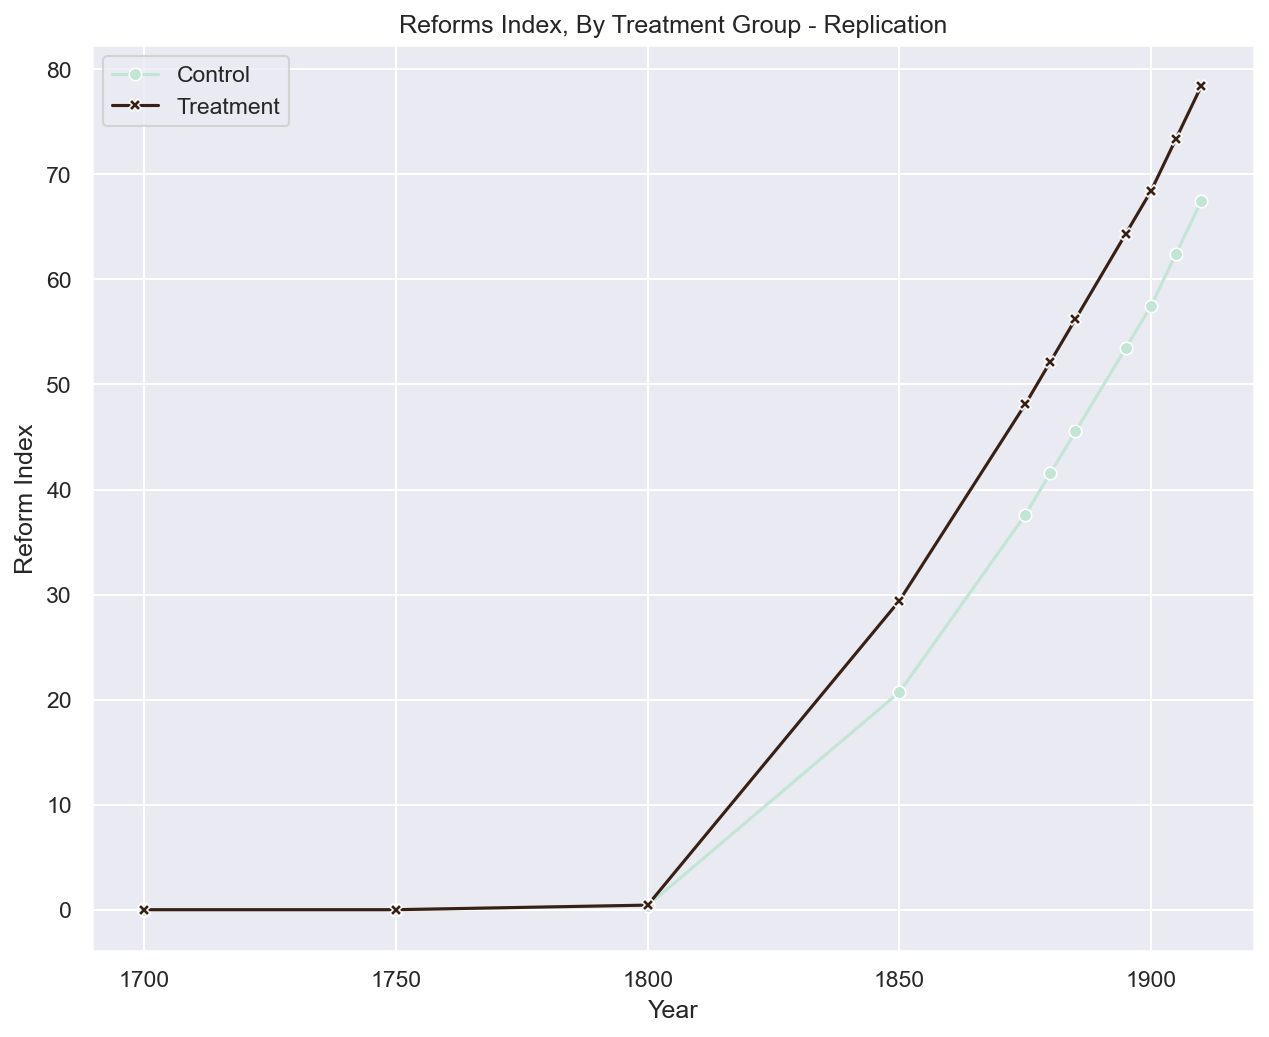

In [11]:
fig, ax = plt.subplots(figsize=(10,8),dpi=150)
sns.lineplot(data=means , alpha=1,palette="ch:9.9,.5", style="choice",
                dashes=False, markers=True)

plt.title('Reforms Index, By Treatment Group - Replication')
plt.legend(['Control','Treatment'])
plt.xlabel('Year')
plt.ylabel('Reform Index')

## Table 2 -  Descriptive Statistics

By using the descriptive statistics shown here we can look if there was an important difference in variables like urbanization rates between territories and between years before and after the French revolution. We can also get an idea of how differences in geographic characteristics like latitude or longitude could affect this urbanization rate.

## Original

![Imagen](img/Tabla2.png)

### How the author's made it

In [12]:
import ipystata
from ipystata.config import config_stata
config_stata('/Applications/Stata/StataMP.app/Contents/MacOS/stataMP')

IPyStata is loaded in batch mode.


In [13]:
datastata = pd.read_stata(pathout + 'replication_dataset.dta')

In [14]:
%%stata -d datastata
sort year 
gen napoleon = (fpresence>0)
by year: sum urbrate if westelbe==1 [aweight=totalpop1750], format
by year: sum urbrate if westelbe==1 & napoleon==1 [aweight=totalpop1750], format
by year: sum urbrate if westelbe==1 & napoleon==0 [aweight=totalpop1750], format
sum protestant latitude longitude distpa if westelbe==1 [aweight=totalpop1750]
sum protestant latitude longitude distpa if westelbe==1 & napoleon==1 [aweight=totalpop1750]
sum protestant latitude longitude distpa if westelbe==1 & napoleon==0 [aweight=totalpop1750]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> year = 1700

    Variable |     Obs      Weight        Mean   Std. Dev.       Min        Max
-------------+-----------------------------------------------------------------
     urbrate |       9  5908932.31    5.860151   4.220067          0   14.17178

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> year = 1750

    Variable |     Obs      Weight        Mean   Std. Dev.       Min        Max
-------------+-----------------------------------------------------------------
     urbrate |      13  8640353.31    7.893195   4.116747   2.091131   19.41308

-----------------------------------------------------------------------------------

In [15]:
%%stata -d datastata
sort year 
gen napoleon = (fpresence>0)
by year: sum urbrate [aweight=totalpop1750], format
by year: sum urbrate if napoleon==1 [aweight=totalpop1750], format	
by year: sum urbrate if napoleon==0 [aweight=totalpop1750], format
sum protestant latitude longitude distpa [aweight=totalpop1750] 	
sum protestant latitude longitude distpa if napoleon==1 [aweight=totalpop1750]
sum protestant latitude longitude distpa if napoleon==0 [aweight=totalpop1750] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> year = 1700

    Variable |     Obs      Weight        Mean   Std. Dev.       Min        Max
-------------+-----------------------------------------------------------------
     urbrate |      14  8359312.31    7.079631   5.608046          0   19.02585

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> year = 1750

    Variable |     Obs      Weight        Mean   Std. Dev.       Min        Max
-------------+-----------------------------------------------------------------
     urbrate |      19  12144187.3    8.588471   4.612347   2.091131   19.41308

-----------------------------------------------------------------------------------

## Replication
For table 2 we will start getting the mean and standar deviation values for the urbanization rates differentiating by West of the Elbe, and all the sample. Also differentiating by control and treatment group.

I had to do one by one because even if I can get mean by year "easly", numpy.std doesn't have an option for weighted standard deviation.

You will find some variables with .mean or .std at the end. These repressent the mean and the standard deviation for each variable. I will show the mean values but if you want to take a look on the standard deviation you just have to delete the `#` and run the commands.

![Imagen](img/TABLA2D.png)

In [14]:
from statsmodels.stats.weightstats import DescrStatsW

In [15]:
DATA = pd.read_stata(pathout + 'replication_dataset.dta')

In [16]:
DATAWEST = DATA.drop(DATA[DATA.westelbe == 0].index)
DATAWEST = DATAWEST.dropna()

In [17]:
DATAWEST['napoleon']=np.where(DATAWEST['fpresence']>0,1,0) 

#### Column 1
#### West of the Elbe - All

In [18]:
#Urban rate 1700
DATAWESTURBAN1700 = DATAWEST[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATAWESTURBAN1700 = DATAWESTURBAN1700.drop(DATAWESTURBAN1700[DATAWESTURBAN1700.year != 1700].index)

In [19]:
WESTURBAN1700 = DescrStatsW(DATAWESTURBAN1700.urbrate, weights=DATAWESTURBAN1700.totalpop1750, ddof=680000)
WESTURBAN1700.mean
#WESTURBAN1700.std

5.860150524338271

In [21]:
#Urban rate 1750
DATAWESTURBAN1750 = DATAWEST[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATAWESTURBAN1750 = DATAWESTURBAN1750.drop(DATAWESTURBAN1750[DATAWESTURBAN1750.year != 1750].index)

In [22]:
WESTURBAN1750 = DescrStatsW(DATAWESTURBAN1750.urbrate, weights=DATAWESTURBAN1750.totalpop1750, ddof=680000)
WESTURBAN1750.mean
#WESTURBAN1750.std

7.89319522275969

In [23]:
#Urban rate 1800
DATAWESTURBAN1800 = DATAWEST[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATAWESTURBAN1800 = DATAWESTURBAN1800.drop(DATAWESTURBAN1800[DATAWESTURBAN1800.year != 1800].index)

In [24]:
WESTURBAN1800 = DescrStatsW(DATAWESTURBAN1800.urbrate, weights=DATAWESTURBAN1800.totalpop1750, ddof=680000)
#WESTURBAN1800.std
WESTURBAN1800.mean

10.228541974834817

In [25]:
#Urban rate 1850
DATAWESTURBAN1850 = DATAWEST[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATAWESTURBAN1850 = DATAWESTURBAN1850.drop(DATAWESTURBAN1850[DATAWESTURBAN1850.year != 1850].index)

In [26]:
WESTURBAN1850 = DescrStatsW(DATAWESTURBAN1850.urbrate, weights=DATAWESTURBAN1850.totalpop1750, ddof=680000)
#WESTURBAN1850.std
WESTURBAN1850.mean

13.77542598424837

In [28]:
#Urban rate 1875
DATAWESTURBAN1875 = DATAWEST[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATAWESTURBAN1875 = DATAWESTURBAN1875.drop(DATAWESTURBAN1875[DATAWESTURBAN1875.year != 1875].index)

In [29]:
WESTURBAN1875 = DescrStatsW(DATAWESTURBAN1875.urbrate, weights=DATAWESTURBAN1875.totalpop1750, ddof=680000)
#WESTURBAN1875.std
WESTURBAN1875.mean

25.697089352918738

In [30]:
#Urban rate 1900
DATAWESTURBAN1900 = DATAWEST[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATAWESTURBAN1900 = DATAWESTURBAN1900.drop(DATAWESTURBAN1900[DATAWESTURBAN1900.year != 1900].index)

In [31]:
WESTURBAN1900 = DescrStatsW(DATAWESTURBAN1900.urbrate, weights=DATAWESTURBAN1900.totalpop1750, ddof=680000)
#WESTURBAN1900.std
WESTURBAN1900.mean

39.89015547475725

In [32]:
##Protestant
DATAWESTPROT = DATAWEST[['protestant', 'totalpop1750','napoleon']].copy()
WESTPROT = DescrStatsW(DATAWESTPROT.protestant, weights=DATAWESTPROT.totalpop1750, ddof=680000)
WESTPROT.mean
#WESTPROT.std

0.5926223718361531

In [33]:
##Latitude
DATAWESTLAT = DATAWEST[['latitude', 'totalpop1750','napoleon']].copy()
WESTLAT = DescrStatsW(DATAWESTLAT.latitude, weights=DATAWESTLAT.totalpop1750, ddof=680000)
WESTLAT.mean
#WESTLAT.std

50.427998061272795

In [34]:
##Longitude
DATAWESTLON = DATAWEST[['longitude', 'totalpop1750','napoleon']].copy()
WESTLON = DescrStatsW(DATAWESTLON.longitude, weights=DATAWESTLON.totalpop1750, ddof=680000)
WESTLON.mean
#WESTLON.std

9.993392778532831

In [35]:
##Distance to Paris
DATAWESTDIS = DATAWEST[['distpa', 'totalpop1750','napoleon']].copy()
WESTDIS = DescrStatsW(DATAWESTDIS.distpa, weights=DATAWESTDIS.totalpop1750, ddof=680000)
WESTDIS.mean
#WESTDIS.std

600.0817845753669

#### Column 2
#### West of the Elbe - Control

In [37]:
#Urban rate 1700 control
DATAWESTURBAN1700CONTROL = DATAWESTURBAN1700
DATAWESTURBAN1700CONTROL = DATAWESTURBAN1700CONTROL.drop(DATAWESTURBAN1700CONTROL[DATAWESTURBAN1700CONTROL.napoleon != 0].index)

In [38]:
WESTURBAN1700CONTROL = DescrStatsW(DATAWESTURBAN1700CONTROL.urbrate, weights=DATAWESTURBAN1700CONTROL.totalpop1750, ddof=850000)
WESTURBAN1700CONTROL.mean
#WESTURBAN1700CONTROL.std

5.4915732504309895

In [39]:
#Urban rate 1750 control
DATAWESTURBAN1750CONTROL = DATAWESTURBAN1750
DATAWESTURBAN1750CONTROL = DATAWESTURBAN1750CONTROL.drop(DATAWESTURBAN1750CONTROL[DATAWESTURBAN1750CONTROL.napoleon != 0].index)

WESTURBAN1750CONTROL = DescrStatsW(DATAWESTURBAN1750CONTROL.urbrate, weights=DATAWESTURBAN1750CONTROL.totalpop1750, ddof=850000)
WESTURBAN1750CONTROL.mean
#WESTURBAN1750CONTROL.std

7.659864411790428

In [40]:
#Urban rate 1800 control
DATAWESTURBAN1800CONTROL = DATAWESTURBAN1800
DATAWESTURBAN1800CONTROL = DATAWESTURBAN1800CONTROL.drop(DATAWESTURBAN1800CONTROL[DATAWESTURBAN1800CONTROL.napoleon != 0].index)

WESTURBAN1800CONTROL = DescrStatsW(DATAWESTURBAN1800CONTROL.urbrate, weights=DATAWESTURBAN1800CONTROL.totalpop1750, ddof=850000)
WESTURBAN1800CONTROL.mean
#WESTURBAN1800CONTROL.std

8.446825259047744

In [41]:
#Urban rate 1850 control
DATAWESTURBAN1850CONTROL = DATAWESTURBAN1850
DATAWESTURBAN1850CONTROL = DATAWESTURBAN1850CONTROL.drop(DATAWESTURBAN1850CONTROL[DATAWESTURBAN1850CONTROL.napoleon != 0].index)

WESTURBAN1850CONTROL = DescrStatsW(DATAWESTURBAN1850CONTROL.urbrate, weights=DATAWESTURBAN1850CONTROL.totalpop1750, ddof=850000)
WESTURBAN1850CONTROL.mean
#WESTURBAN1850CONTROL.std

12.384123046889094

In [42]:
#Urban rate 1875 control
DATAWESTURBAN1875CONTROL = DATAWESTURBAN1875
DATAWESTURBAN1875CONTROL = DATAWESTURBAN1875CONTROL.drop(DATAWESTURBAN1875CONTROL[DATAWESTURBAN1875CONTROL.napoleon != 0].index)

WESTURBAN1875CONTROL = DescrStatsW(DATAWESTURBAN1875CONTROL.urbrate, weights=DATAWESTURBAN1875CONTROL.totalpop1750, ddof=850000)
WESTURBAN1875CONTROL.mean
#WESTURBAN1875CONTROL.std

22.22139893059001

In [43]:
#Urban rate 1900 control
DATAWESTURBAN1900CONTROL = DATAWESTURBAN1900
DATAWESTURBAN1900CONTROL = DATAWESTURBAN1900CONTROL.drop(DATAWESTURBAN1900CONTROL[DATAWESTURBAN1900CONTROL.napoleon != 0].index)

WESTURBAN1900CONTROL = DescrStatsW(DATAWESTURBAN1900CONTROL.urbrate, weights=DATAWESTURBAN1900CONTROL.totalpop1750, ddof=850000)
WESTURBAN1900CONTROL.mean
#WESTURBAN1900CONTROL.std

35.604048155797585

In [44]:
##Protestant control
DATAWESTPROTC = DATAWEST[['protestant', 'totalpop1750','napoleon']].copy()
DATAWESTPROTC = DATAWESTPROTC.drop(DATAWESTPROTC[DATAWESTPROTC.napoleon != 0].index)
WESTPROTC = DescrStatsW(DATAWESTPROTC.protestant, weights=DATAWESTPROTC.totalpop1750, ddof=680000)

WESTPROTC.mean
#WESTPROTC.std

0.5384803609811151

In [45]:
##Latitude control
DATAWESTLATC = DATAWEST[['latitude', 'totalpop1750','napoleon']].copy()
DATAWESTLATC = DATAWESTLATC.drop(DATAWESTLATC[DATAWESTLATC.napoleon != 0].index)
WESTLATC = DescrStatsW(DATAWESTLATC.latitude, weights=DATAWESTLATC.totalpop1750, ddof=680000)

WESTLATC.mean
#WESTLATC.std

49.28867510775836

In [46]:
##Longitude control
DATAWESTLONC = DATAWEST[['longitude', 'totalpop1750','napoleon']].copy()
DATAWESTLONC = DATAWESTLONC.drop(DATAWESTLONC[DATAWESTLONC.napoleon != 0].index)
WESTLONC = DescrStatsW(DATAWESTLONC.longitude, weights=DATAWESTLONC.totalpop1750, ddof=680000)

WESTLONC.mean
#WESTLONC.std

10.955034897515946

In [47]:
##Distance to Paris control
DATAWESTDISC = DATAWEST[['distpa', 'totalpop1750','napoleon']].copy()
DATAWESTDISC = DATAWESTDISC.drop(DATAWESTDISC[DATAWESTDISC.napoleon != 0].index)
WESTDISC = DescrStatsW(DATAWESTDISC.distpa, weights=DATAWESTDISC.totalpop1750, ddof=680000)

WESTDISC.mean
#WESTDISC.std

636.7951291299598

#### Column 3
#### West of the Elbe - Treated

In [49]:
DATAWESTURBAN1700TREATED = DATAWESTURBAN1700
DATAWESTURBAN1700TREATED = DATAWESTURBAN1700TREATED.drop(DATAWESTURBAN1700TREATED[DATAWESTURBAN1700TREATED.napoleon != 1].index)

In [50]:
#Urban 1700 Treated
WESTURBAN1700TREATED = DescrStatsW(DATAWESTURBAN1700TREATED.urbrate, weights=DATAWESTURBAN1700TREATED.totalpop1750, ddof=510000)

#WESTURBAN1700TREATED.std
WESTURBAN1700TREATED.mean


6.350245256690717

In [51]:
#Urban 1750 Treated
DATAWESTURBAN1750TREATED = DATAWESTURBAN1750
DATAWESTURBAN1750TREATED = DATAWESTURBAN1750TREATED.drop(DATAWESTURBAN1750TREATED[DATAWESTURBAN1750TREATED.napoleon != 1].index)

WESTURBAN1750TREATED = DescrStatsW(DATAWESTURBAN1750TREATED.urbrate, weights=DATAWESTURBAN1750TREATED.totalpop1750, ddof=580000)

#WESTURBAN1750TREATED.std
WESTURBAN1750TREATED.mean

8.092629245342511

In [52]:
#Urban 1800 Treated
DATAWESTURBAN1800TREATED = DATAWESTURBAN1800
DATAWESTURBAN1800TREATED = DATAWESTURBAN1800TREATED.drop(DATAWESTURBAN1800TREATED[DATAWESTURBAN1800TREATED.napoleon != 1].index)

WESTURBAN1800TREATED = DescrStatsW(DATAWESTURBAN1800TREATED.urbrate, weights=DATAWESTURBAN1800TREATED.totalpop1750, ddof=580000)

#WESTURBAN1800TREATED.std
WESTURBAN1800TREATED.mean

11.751422430512319

In [53]:
#Urban 1850 Treated
DATAWESTURBAN1850TREATED = DATAWESTURBAN1850
DATAWESTURBAN1850TREATED = DATAWESTURBAN1850TREATED.drop(DATAWESTURBAN1850TREATED[DATAWESTURBAN1850TREATED.napoleon != 1].index)

WESTURBAN1850TREATED = DescrStatsW(DATAWESTURBAN1850TREATED.urbrate, weights=DATAWESTURBAN1850TREATED.totalpop1750, ddof=580000)

#WESTURBAN1850TREATED.std
WESTURBAN1850TREATED.mean

14.964609445601916

In [54]:
#Urban 1875 Treated
DATAWESTURBAN1875TREATED = DATAWESTURBAN1875
DATAWESTURBAN1875TREATED = DATAWESTURBAN1875TREATED.drop(DATAWESTURBAN1875TREATED[DATAWESTURBAN1875TREATED.napoleon != 1].index)

WESTURBAN1875TREATED = DescrStatsW(DATAWESTURBAN1875TREATED.urbrate, weights=DATAWESTURBAN1875TREATED.totalpop1750, ddof=580000)

#WESTURBAN1875TREATED.std
WESTURBAN1875TREATED.mean

28.667853990894137

In [55]:
#Urban 1900 Treated
DATAWESTURBAN1900TREATED = DATAWESTURBAN1900
DATAWESTURBAN1900TREATED = DATAWESTURBAN1900TREATED.drop(DATAWESTURBAN1900TREATED[DATAWESTURBAN1900TREATED.napoleon != 1].index)

WESTURBAN1900TREATED = DescrStatsW(DATAWESTURBAN1900TREATED.urbrate, weights=DATAWESTURBAN1900TREATED.totalpop1750, ddof=580000)

#WESTURBAN1900TREATED.std
WESTURBAN1900TREATED.mean

43.55360489359293

In [56]:
##Protestant control
DATAWESTPROTT = DATAWEST[['protestant', 'totalpop1750','napoleon']].copy()
DATAWESTPROTT = DATAWESTPROTT.drop(DATAWESTPROTT[DATAWESTPROTT.napoleon != 1].index)
WESTPROTT = DescrStatsW(DATAWESTPROTT.protestant, weights=DATAWESTPROTT.totalpop1750, ddof=580000)

WESTPROTT.mean
#WESTPROTT.std

0.6414241936517694

In [57]:
##Latitude control
DATAWESTLATT = DATAWEST[['latitude', 'totalpop1750','napoleon']].copy()
DATAWESTLATT = DATAWESTLATT.drop(DATAWESTLATT[DATAWESTLATT.napoleon != 1].index)
WESTLATT = DescrStatsW(DATAWESTLATT.latitude, weights=DATAWESTLATT.totalpop1750, ddof=580000)

WESTLATT.mean
#WESTLATT.std

51.45494617217177

In [58]:
##Longitude control
DATAWESTLONT = DATAWEST[['longitude', 'totalpop1750','napoleon']].copy()
DATAWESTLONT = DATAWESTLONT.drop(DATAWESTLONT[DATAWESTLONT.napoleon != 1].index)
WESTLONT = DescrStatsW(DATAWESTLONT.longitude, weights=DATAWESTLONT.totalpop1750, ddof=580000)

WESTLONT.mean
#WESTLONT.std

9.126600308141258

In [59]:
##Distance to Paris control
DATAWESTDIST = DATAWEST[['distpa', 'totalpop1750','napoleon']].copy()
DATAWESTDIST = DATAWESTDIST.drop(DATAWESTDIST[DATAWESTDIST.napoleon != 1].index)
WESTDIST = DescrStatsW(DATAWESTDIST.distpa, weights=DATAWESTDIST.totalpop1750, ddof=580000)

WESTDIST.mean
#WESTDIST.std

566.9895873903439

#### Column 4
#### Whole Sample - Control

In [60]:
DATALL = DATA
DATALL = DATALL.dropna()

In [62]:
DATALL['napoleon']=np.where(DATALL['fpresence']>0,1,0)  

<ipython-input-62-dcd29439a100>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATALL['napoleon']=np.where(DATALL['fpresence']>0,1,0)


In [63]:
#Urban rate 1700
DATALLURBAN1700 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1700 = DATALLURBAN1700.drop(DATALLURBAN1700[DATALLURBAN1700.year != 1700].index)

In [64]:
#Urban rate 1700 control Whole sample
DATALLURBAN1700CONTROL = DATALLURBAN1700
DATALLURBAN1700CONTROL = DATALLURBAN1700CONTROL.drop(DATALLURBAN1700CONTROL[DATALLURBAN1700CONTROL.napoleon != 0].index)

ALLURBAN1700CONTROL = DescrStatsW(DATALLURBAN1700CONTROL.urbrate, weights=DATALLURBAN1700CONTROL.totalpop1750, ddof=850000)
ALLURBAN1700CONTROL.mean
#ALLURBAN1700CONTROL.std

7.683413524646402

In [65]:
#Urban rate 1750 control Whole sample

DATALLURBAN1750 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1750 = DATALLURBAN1750.drop(DATALLURBAN1750[DATALLURBAN1750.year != 1750].index)

DATALLURBAN1750CONTROL = DATALLURBAN1750
DATALLURBAN1750CONTROL = DATALLURBAN1750CONTROL.drop(DATALLURBAN1750CONTROL[DATALLURBAN1750CONTROL.napoleon != 0].index)

ALLURBAN1750CONTROL = DescrStatsW(DATALLURBAN1750CONTROL.urbrate, weights=DATALLURBAN1750CONTROL.totalpop1750, ddof=680000)
ALLURBAN1750CONTROL.mean
#ALLURBAN1750CONTROL.std

8.897049936929093

In [66]:
#Urban rate 1800 control Whole sample

DATALLURBAN1800 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1800 = DATALLURBAN1800.drop(DATALLURBAN1800[DATALLURBAN1800.year != 1800].index)

DATALLURBAN1800CONTROL = DATALLURBAN1800
DATALLURBAN1800CONTROL = DATALLURBAN1800CONTROL.drop(DATALLURBAN1800CONTROL[DATALLURBAN1800CONTROL.napoleon != 0].index)

ALLURBAN1800CONTROL = DescrStatsW(DATALLURBAN1800CONTROL.urbrate, weights=DATALLURBAN1800CONTROL.totalpop1750, ddof=680000)
ALLURBAN1800CONTROL.mean
#ALLURBAN1800CONTROL.std

10.220954941665136

In [67]:
#Urban rate 1850 control Whole sample

DATALLURBAN1850 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1850 = DATALLURBAN1850.drop(DATALLURBAN1850[DATALLURBAN1850.year != 1850].index)

DATALLURBAN1850CONTROL = DATALLURBAN1850
DATALLURBAN1850CONTROL = DATALLURBAN1850CONTROL.drop(DATALLURBAN1850CONTROL[DATALLURBAN1850CONTROL.napoleon != 0].index)

ALLURBAN1850CONTROL = DescrStatsW(DATALLURBAN1850CONTROL.urbrate, weights=DATALLURBAN1850CONTROL.totalpop1750, ddof=680000)
ALLURBAN1850CONTROL.mean
#ALLURBAN1850CONTROL.std

14.451243450754959

In [68]:
#Urban rate 1875 control Whole sample

DATALLURBAN1875 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1875 = DATALLURBAN1875.drop(DATALLURBAN1875[DATALLURBAN1875.year != 1875].index)

DATALLURBAN1875CONTROL = DATALLURBAN1875
DATALLURBAN1875CONTROL = DATALLURBAN1875CONTROL.drop(DATALLURBAN1875CONTROL[DATALLURBAN1875CONTROL.napoleon != 0].index)

ALLURBAN1875CONTROL = DescrStatsW(DATALLURBAN1875CONTROL.urbrate, weights=DATALLURBAN1875CONTROL.totalpop1750, ddof=680000)
ALLURBAN1875CONTROL.mean
#ALLURBAN1875CONTROL.std

25.1877393434764

In [69]:
#Urban rate 1900 control Whole sample

DATALLURBAN1900 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1900 = DATALLURBAN1900.drop(DATALLURBAN1900[DATALLURBAN1900.year != 1900].index)

DATALLURBAN1900CONTROL = DATALLURBAN1900
DATALLURBAN1900CONTROL = DATALLURBAN1900CONTROL.drop(DATALLURBAN1900CONTROL[DATALLURBAN1900CONTROL.napoleon != 0].index)

ALLURBAN1900CONTROL = DescrStatsW(DATALLURBAN1900CONTROL.urbrate, weights=DATALLURBAN1900CONTROL.totalpop1750, ddof=680000)
ALLURBAN1900CONTROL.mean
#ALLURBAN1900CONTROL.std

38.26551108490451

In [70]:
##Protestant control whole sample
DATALLPROTT = DATALL[['protestant', 'totalpop1750','napoleon']].copy()
DATALLPROTT = DATALLPROTT.drop(DATALLPROTT[DATALLPROTT.napoleon != 0].index)
ALLPROTT = DescrStatsW(DATALLPROTT.protestant, weights=DATALLPROTT.totalpop1750, ddof=580000)

ALLPROTT.mean
#ALLPROTT.std

0.6836536241209011

In [71]:
##Latitude control whole sample
DATALLLATC = DATALL[['latitude', 'totalpop1750','napoleon']].copy()
DATALLLATC = DATALLLATC.drop(DATALLLATC[DATALLLATC.napoleon != 0].index)
ALLLATC = DescrStatsW(DATALLLATC.latitude, weights=DATALLLATC.totalpop1750, ddof=580000)

ALLLATC.mean
#ALLLATC.std

50.97987287042815

In [72]:
##Longitude control whole sample
DATALLLONC = DATALL[['longitude', 'totalpop1750','napoleon']].copy()
DATALLLONC = DATALLLONC.drop(DATALLLONC[DATALLLONC.napoleon != 0].index)
ALLLONC = DescrStatsW(DATALLLONC.longitude, weights=DATALLLONC.totalpop1750, ddof=580000)

ALLLONC.mean
#ALLLONC.std

12.747230735698333

In [73]:
##Distance to Paris control whole sample
DATALLDISTC = DATALL[['distpa', 'totalpop1750','napoleon']].copy()
DATALLDISTC = DATALLDISTC.drop(DATALLDISTC[DATALLDISTC.napoleon != 0].index)
ALLDISTC = DescrStatsW(DATALLDISTC.distpa, weights=DATALLDISTC.totalpop1750, ddof=580000)

ALLDISTC.mean
#ALLDISTC.std

807.4158938639672

#### Column 5
#### Whole Sample - ALL

In [74]:
#Urban rate 1700 ALL - Whole sample
DATALLURBAN1700 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1700 = DATALLURBAN1700.drop(DATALLURBAN1700[DATALLURBAN1700.year != 1700].index)

ALLURBAN1700 = DescrStatsW(DATALLURBAN1700.urbrate, weights=DATALLURBAN1700.totalpop1750, ddof=640000)
ALLURBAN1700.mean
#ALLURBAN1700.std

7.268137191100369

In [75]:
#Urban rate 1750 ALL - Whole sample
DATALLURBAN1750 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1750 = DATALLURBAN1750.drop(DATALLURBAN1750[DATALLURBAN1750.year != 1750].index)

ALLURBAN1750 = DescrStatsW(DATALLURBAN1750.urbrate, weights=DATALLURBAN1750.totalpop1750, ddof=640000)
ALLURBAN1750.mean
#ALLURBAN1750.std

8.588470909981682

In [76]:
#Urban rate 1800 ALL - Whole sample
DATALLURBAN1800 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1800 = DATALLURBAN1800.drop(DATALLURBAN1800[DATALLURBAN1800.year != 1800].index)

ALLURBAN1800 = DescrStatsW(DATALLURBAN1800.urbrate, weights=DATALLURBAN1800.totalpop1750, ddof=640000)
ALLURBAN1800.mean
#ALLURBAN1800.std

10.808048453085934

In [77]:
#Urban rate 1850 ALL - Whole sample
DATALLURBAN1850 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1850 = DATALLURBAN1850.drop(DATALLURBAN1850[DATALLURBAN1850.year != 1850].index)

ALLURBAN1850 = DescrStatsW(DATALLURBAN1850.urbrate, weights=DATALLURBAN1850.totalpop1750, ddof=640000)
ALLURBAN1850.mean
#ALLURBAN1850.std

14.648172720246174

In [78]:
#Urban rate 1875 ALL - Whole sample
DATALLURBAN1875 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1875 = DATALLURBAN1875.drop(DATALLURBAN1875[DATALLURBAN1875.year != 1875].index)
ALLURBAN1875 = DescrStatsW(DATALLURBAN1875.urbrate, weights=DATALLURBAN1875.totalpop1750, ddof=640000)
ALLURBAN1875.mean
#ALLURBAN1875.std

26.52272538100303

In [79]:
#Urban rate 1900 ALL - Whole sample
DATALLURBAN1900 = DATALL[['urbrate', 'totalpop1750','year','napoleon']].copy()
DATALLURBAN1900 = DATALLURBAN1900.drop(DATALLURBAN1900[DATALLURBAN1900.year != 1900].index)

ALLURBAN1900 = DescrStatsW(DATALLURBAN1900.urbrate, weights=DATALLURBAN1900.totalpop1750, ddof=640000)
ALLURBAN1900.mean
#ALLURBAN1900.std

40.2940452324701

In [80]:
##Protestant control whole sample
DATALLPROT = DATALL[['protestant', 'totalpop1750','napoleon']].copy()

ALLPROT = DescrStatsW(DATALLPROT.protestant, weights=DATALLPROT.totalpop1750, ddof=640000)

ALLPROT.mean
#ALLPROT.std

0.6678142994268015

In [81]:
##Latitude control whole sample
DATALLLAT = DATALL[['latitude', 'totalpop1750','napoleon']].copy()
ALLLAT = DescrStatsW(DATALLLAT.latitude, weights=DATALLLAT.totalpop1750, ddof=640000)

ALLLAT.mean
#ALLLAT.std

51.15806235099232

In [82]:
##Longitude control whole sample
DATALLLON = DATALL[['longitude', 'totalpop1750','napoleon']].copy()
ALLLON = DescrStatsW(DATALLLON.longitude, weights=DATALLLON.totalpop1750, ddof=640000)

ALLLON.mean
#ALLLON.std

11.389212398668352

In [83]:
##Distance to Paris control whole sample
DATALLDIST = DATALL[['distpa', 'totalpop1750','napoleon']].copy()
ALLDIST = DescrStatsW(DATALLDIST.distpa, weights=DATALLDIST.totalpop1750, ddof=640000)

ALLDIST.mean
#ALLDIST.std

717.2373077231358

# Figure 2A. Urbanization Rates, by Treatment Group

For figure 2A we will just use the information about the urban rate, differentiating by control, and treatment group. You can also see the difference between these 2, and analyze how this difference is bigger since 1705.

## Original
The author doesn't show how he makes graphs.

![Imagen](img/Figura21.png)

## Replication

In [390]:
datafig2 = pd.read_stata(pathout + 'replication_dataset.dta')

In [391]:
meansfig = data1.groupby(['year', 'napoleon'])['urbrate'].mean().unstack()
meansfig2 = data1.groupby(['year', 'westelbe'])['urbrate'].mean().unstack()

In [394]:

dataf2 = {'Year': [1700, 1750, 1800, 1850,1875,1880,1885,1895,1900], 
        'West': [4.965689 ,7.704638 ,10.237379 ,13.382242 ,24.521772 ,28.461521 ,
                   30.805981 ,38.269096 ,39.198532], 
          'treatment': [5.359634,8.161680,11.891592,14.509822,26.807312,30.080849,32.355259,40.437576,42.384228
]
       } 

fig2 = pd.DataFrame(dataf2)
Year = pd.Categorical(fig2.Year)
fig2 = fig2.set_index([ 'Year'])


In [395]:

fig2['Diference']=  fig2.treatment - fig2.West 


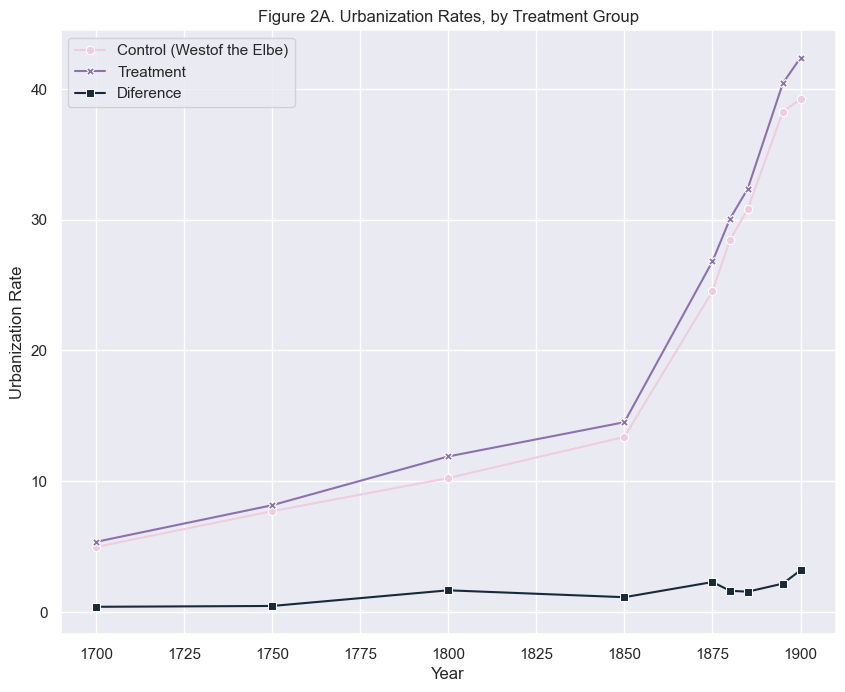

In [396]:
fig, ax = plt.subplots(figsize=(10,8),dpi=100)
plt.style.use('seaborn-colorblind')
sns.lineplot(data=fig2 , alpha=1,palette="ch:8.5,.45", style="choice",
                dashes=False, markers=True)

plt.title('Figure 2A. Urbanization Rates, by Treatment Group')
plt.legend(['Control (Westof the Elbe)','Treatment','Diference'])
plt.xlabel('Year')
plt.ylabel('Urbanization Rate')



plt.show()

# Figure 2B. Urbanization Rates, by Treatment Group

The idea is the same that in figure 2A. Now we will use the whole sample to see the difference between the territories with high French influence and territories with low or any French influence.

## Original
The author doesn't show how he makes graphs.

![Imagen](img/Figura22.png)

## Replication

In [403]:
meansfig = data1.groupby(['year', 'napoleon'])['urbrate'].mean().unstack()

In [404]:
dataf22 = {'Year': [1700, 1750, 1800, 1850,1875,1880,1885,1895,1900], 
        'Control': [6.301950,8.037416,10.001850,14.123228,24.170938,23.895399,26.050716,31.349073,
                    36.435326], 
          
          'Treatment': [5.359634,8.161680,11.891592,14.509822,26.807312,30.080849,32.355259,
                        40.437576,42.384228
                       ]
       } 
fig22 = pd.DataFrame(dataf22)
Year = pd.Categorical(fig22.Year)
fig22 = fig22.set_index([ 'Year'])

In [405]:
fig22['difference']= fig22.Treatment - fig22.Control

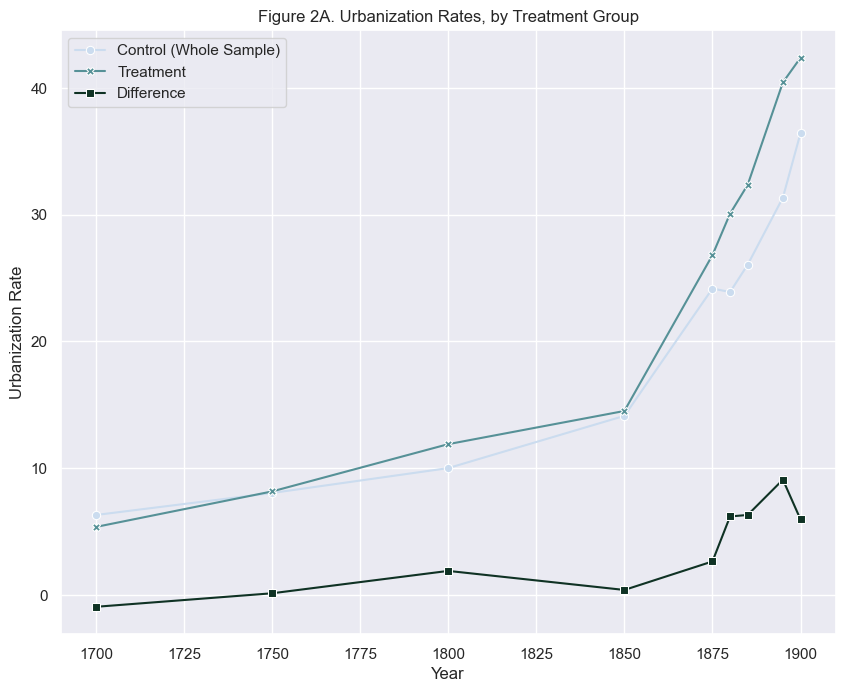

In [406]:
fig, ax = plt.subplots(figsize=(10,8),dpi=100)
plt.style.use('seaborn-colorblind')
sns.lineplot(data=fig22 , alpha=1,palette="ch:2.1,.25", style="choice",
                dashes=False, markers=True)

plt.title('Figure 2A. Urbanization Rates, by Treatment Group')
plt.legend(['Control (Whole Sample)','Treatment','Difference'])
plt.xlabel('Year')
plt.ylabel('Urbanization Rate')



plt.show()

# Table 3 - Urbanization In Germany

Table 3 contains 4 regresions:
#### - Regresion 1: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr $
 
For the West of Elbe and weighted by total population in 1750 
 
 #### - Regresion 2:
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr $
 
 
For the West of Elbe and no weight
 
 
####  - Regresion 3:
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr $
 

For the whole sample and weighted by total population in 1750
 
 
####  - Regresion 4: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr $
 

For the whole sample
 
Where:

- Urbrate: (urban population /total population) *100
- fpresence1750: Is an interacction between fpresence and yr1750
- fpresence1800: Is an interacction between fpresence and yr1800
- fpresence1850: Is an interacction between fpresence and yr1850
- fpresence1875: Is an interacction between fpresence and yr1875
- fpresence1900: Is an interacction between fpresence and yr1900
- yr*: Abbreviation for 6 Dummy variable = 1 for yr1700, yr1750, yr1800, yr1850, yr1875 and yr1900
 

In table 3 we can see that by 1800 the areas with more years of French presence were growing slower,and by 1850 there wasn't an statistical effect of years of French presence on the growth of urbanization. By 1900 we saw an positive effect of the French presence over the urbanization rates.
Also we can see that for west of the Elby, we got a higher effect of the French presence, relative to all the sample, in 1850, 1875 and 1900. 
We can see that we didn't got any statisticly significant value, but this is explained by the high correlation between regressors. Thats why we have to look for the F test.

## Original

![Imagen](img/Tabla3.png)

In [33]:
import ipystata
from ipystata.config import config_stata
config_stata('/Applications/Stata/StataMP.app/Contents/MacOS/stataMP')

#### Regression 1 - By author

In [34]:
%%stata -d datastata
sort id year
xtreg urbrate fpresence1750 fpresence1800 fpresence1850 fpresence1875 fpresence1900 yr* if westelbe==1 [aweight=totalpop1750], fe i(id) cluster(id)


note: yr1900 omitted because of collinearity
note: yr1880 omitted because of collinearity
note: yr1885 omitted because of collinearity
note: yr1895 omitted because of collinearity
note: yr1905 omitted because of collinearity
note: yr1910 omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =         74
Group variable: id                              Number of groups  =         13

R-sq:                                           Obs per group:
     within  = 0.9188                                         min =          5
     between = 0.1275                                         avg =        5.7
     overall = 0.6743                                         max =          6

                                                F(10,12)          =     935.92
corr(u_i, Xb)  = 0.0165                         Prob > F          =     0.0000

                                     (Std. Err. adjusted for 13 clusters in id)
-----------------------------

#### Regression 2 By author

In [35]:
%%stata -d datastata
sort id year
xtreg urbrate fpresence1750 fpresence1800 fpresence1850 fpresence1875 fpresence1900 yr* if westelbe==1, fe i(id) cluster(id)


note: yr1910 omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =        114
Group variable: id                              Number of groups  =         13

R-sq:                                           Obs per group:
     within  = 0.8797                                         min =          5
     between = 0.3578                                         avg =        8.8
     overall = 0.6795                                         max =         11

                                                F(12,12)          =          .
corr(u_i, Xb)  = 0.0518                         Prob > F          =          .

                                     (Std. Err. adjusted for 13 clusters in id)
-------------------------------------------------------------------------------
              |               Robust
      urbrate |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+------------------------------------------

#### Regression 3 By author

In [36]:
%%stata -d datastata
sort id year
xtreg urbrate fpresence1750 fpresence1800 fpresence1850 fpresence1875 fpresence1900 yr* [aweight=totalpop1750], fe i(id) cluster(id)


note: yr1900 omitted because of collinearity
note: yr1880 omitted because of collinearity
note: yr1885 omitted because of collinearity
note: yr1895 omitted because of collinearity
note: yr1905 omitted because of collinearity
note: yr1910 omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =        109
Group variable: id                              Number of groups  =         19

R-sq:                                           Obs per group:
     within  = 0.8948                                         min =          5
     between = 0.0170                                         avg =        5.7
     overall = 0.6401                                         max =          6

                                                F(10,18)          =     222.22
corr(u_i, Xb)  = 0.0007                         Prob > F          =     0.0000

                                     (Std. Err. adjusted for 19 clusters in id)
-----------------------------

#### Regression 4 By author

In [37]:
%%stata -d datastata
sort id year
xtreg urbrate fpresence1750 fpresence1800 fpresence1850 fpresence1875 fpresence1900 yr*, fe i(id) cluster(id)


note: yr1910 omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =        169
Group variable: id                              Number of groups  =         19

R-sq:                                           Obs per group:
     within  = 0.8714                                         min =          5
     between = 0.1489                                         avg =        8.9
     overall = 0.6454                                         max =         11

                                                F(15,18)          =     457.18
corr(u_i, Xb)  = -0.0179                        Prob > F          =     0.0000

                                     (Std. Err. adjusted for 19 clusters in id)
-------------------------------------------------------------------------------
              |               Robust
      urbrate |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+------------------------------------------

## Replication

![Imagen](img/Tabla3replica.png)

### Table 3 construcction.

For the regressions replication, we will start with regression 1 and 3. These are the regressions for the West of the Elbe and for the whole sample, both weighted. Then we will continue with regressions 2 and 4 which are the regressions for the West of the Elbe and Whole sample, both unweighted. The reason for this is because for the unweighted we need to do an extra step by dropping some years. The explanatory variables are 5 interactions between years of French presence and year.

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Latex
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import linearmodels.panel as pnl


In [39]:
##First we set the database for the Panel OLS Regression.
 
data = pd.read_stata(pathout + 'replication_dataset.dta')

data['ident'] = data.id

year = pd.Categorical(data.year)

data = data.set_index(['id', 'year'])

data['year'] = year

#### - Regresion 1: 

In [40]:
#Now we are going to use the data avalaible only for West of the Elbe 
dwest = data.drop(data[data.westelbe == 0].index)

In [41]:
#Setting exogenous variables.
exog_vars = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900']

exog = sm.add_constant(dwest[exog_vars])

In [42]:
#We run the model with fixed effects, time effects and weighted.
mod4 = PanelOLS(dwest.urbrate, exog, weights=dwest.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

fe_res4 = mod4.fit(cov_type='clustered', clusters=dwest.ident)

print(fe_res4)

/Users/juanestebanrincon/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.3759
Estimator:                   PanelOLS   R-squared (Between):              0.0327
No. Observations:                  74   R-squared (Within):               0.3094
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.2459
Time:                        10:41:10   Log-likelihood                   -199.94
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      34.165
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                    F(5,51)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             15.022
                            

####  - Regresion 3:

In [43]:
#We now set the exogenous variables and run the regression
exog_vars2 = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900']
exog2 = sm.add_constant(data[exog_vars2])

In [44]:
mod2 = PanelOLS(data.urbrate, exog2, weights=data.totalpop1750 , entity_effects=True,time_effects=True)

fe_res2 = mod2.fit(cov_type='clustered', clusters=data.ident)

print(fe_res2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.2261
Estimator:                   PanelOLS   R-squared (Between):             -0.0279
No. Observations:                 109   R-squared (Within):               0.1964
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.1382
Time:                        10:41:12   Log-likelihood                   -308.74
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      36.350
Entities:                          19   P-value                           0.0000
Avg Obs:                       5.7368   Distribution:                    F(5,80)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             6.0428
                            

In [45]:
# We have to drop columnsyr1880 yr1885 yr1895 yr1905 yr1910 and keep year =1700, 1750, 1800, 1850, 1875,1900
dataun = data

dataun = dataun.drop('yr1880', axis=1)
dataun = dataun.drop('yr1885', axis=1)
dataun = dataun.drop('yr1895', axis=1)
dataun = dataun.drop('yr1905', axis=1)
dataun = dataun.drop('yr1910', axis=1)

dataun = dataun.drop(dataun[dataun.year == 1885].index)
dataun = dataun.drop(dataun[dataun.year == 1895].index)
dataun = dataun.drop(dataun[dataun.year == 1880].index)
dataun = dataun.drop(dataun[dataun.year == 1905].index)
dataun = dataun.drop(dataun[dataun.year == 1910].index)


 #### - Regresion 2:

In [46]:
unwest = dataun.drop(dataun[dataun.westelbe == 0].index)
exog_varsunw = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900']

exogunw = sm.add_constant(unwest[exog_varsunw])

In [47]:
#Here you can notice weights = None
mod0 = PanelOLS(unwest.urbrate, exogunw, weights=None , entity_effects=True,time_effects=True)

fe_res0 = mod0.fit(cov_type='clustered', clusters=unwest.ident)

print(fe_res0)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.0995
Estimator:                   PanelOLS   R-squared (Between):              0.0684
No. Observations:                  74   R-squared (Within):               0.1958
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.1667
Time:                        10:41:14   Log-likelihood                   -225.10
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.1271
Entities:                          13   P-value                           0.3580
Avg Obs:                       5.6923   Distribution:                    F(5,51)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             8.0912
                            

####  - Regresion 4: 

In [48]:
exog_varsun = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900']

exogun = sm.add_constant(dataun[exog_varsun])

In [49]:
mod1 = PanelOLS(dataun.urbrate, exogun, weights=None , entity_effects=True,time_effects=True)

fe_res1 = mod1.fit(cov_type='clustered', clusters=dataun.ident)

print(fe_res1)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.0702
Estimator:                   PanelOLS   R-squared (Between):              0.0294
No. Observations:                 109   R-squared (Within):               0.1281
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.1030
Time:                        10:41:16   Log-likelihood                   -329.94
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.2085
Entities:                          19   P-value                           0.3128
Avg Obs:                       5.7368   Distribution:                    F(5,80)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             2.2659
                            

In [50]:
#Now we are going to export the regressions
import statsmodels.api as sm
import linearmodels as ln
from pystout import pystout

In [51]:
#For making the tables I use pystout. It will creat a file .tex that I will put into latex and then bring here the table
pystout(models=[fe_res4,fe_res0,fe_res2,fe_res1],
        file='tabla2.tex',
        addnotes=['Weighted by total population in 1750.' ,'*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Unweighted','Weighted','Unweighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2],'All':[3,4]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

## Table 4 - Urbanization In Germany, Controls.


Table 4 contains 8 regresions:
#### - Regresion 1: 

$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr $

 
For the West of Elbe withour Mark, weighted by total population in 1750 and clustered.
 
 #### - Regresion 2:
 $ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}protestant1 $
 
For the West of Elbe, weighted by total population in 1750 and clustered.
 
 
####  - Regresion 3:

$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}latitude1$

For the West of Elbe, weighted by total population in 1750 and clustered.
 
####  - Regresion 4: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}longitude1 $

For the West of Elbe, weighted by total population in 1750 and clustered.

####  - Regresion 5: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}distpa1 $

For the West of Elbe, weighted by total population in 1750 and clustered.


####  - Regresion 6: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}territories1 $

For the West of Elbe, weighted by total population in 1750 and clustered.

####  - Regresion 7: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}urbanization17501 $

For the West of Elbe, weighted by total population in 1750 and clustered.

####  - Regresion 8: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr, $  robust noleveleq

For the West of Elbe, weighted by total population in 1750 and clustered.

Where:

- Urbrate: (urban population /total population) *100
- fpresence1750: Is an interacction between fpresence and yr1750
- fpresence1800: Is an interacction between fpresence and yr1800
- fpresence1850: Is an interacction between fpresence and yr1850
- fpresence1875: Is an interacction between fpresence and yr1875
- fpresence1900: Is an interacction between fpresence and yr1900
- yr*: Abbreviation for 6 Dummy variable = 1 for yr1700, yr1750, yr1800, yr1850, yr1875 and yr1900
- protestant1* Abbreviation for the interacction between protestant and yrt, for t = 1750, 1800, 1850, 1875 and 1900
- latitude1* Abbreviation for the interacction between latitude and yrt, for t = 1750, 1800, 1850, 1875 and 1900
- longitude* Abbreviation for the interacction between longitude and yrt, for t = 1750, 1800, 1850, 1875 and 1900
- distpa* Abbreviation for the interacction between distpa and yrt, for t = 1750, 1800, 1850, 1875 and 1900
- territories* Abbreviation for the interacction between territories and yrt, for t = 1750, 1800, 1850, 1875 and 1900
- urbanization1750* Abbreviation for the interacction between urbanization1750 and yrt, for t = 1800, 1850, 1875 and 1900



Table 4 looks to control for robustness. We can see that the authors control for many geographic characteristics and some others like protestant rates or excluding Mark.
The authors drop Mark since the presence of coal might have created a differential growth advantage, but as we can see, the results remain almost the same.
Columns 2 - 6 controls for time invariant characteristics, and column 7, tries to control for any mean reversion effects or preexisting trends. The reason of this is because the presence of negative point estimates for 1750 and 1800. All results remained very similar to the baseline regressions.
In conclusion there is no evidence of preexisting trends favoring areas subsequently occupied by the French. 

For table 4 we will add different controls to test robustness. As you saw at the beginning of the section, all the regressions will be made for West of the Elbe, and weighted by the total population in 1750.
The model will remain the same in all regressions. We will just change the exogenous variables and in regression 1, the sample by excluding Mark.

# Original

![Imagen](img/Tabla4.png)

#### Regression 1 by authors

In [52]:
%%stata -d datastata
sort id year
xtreg urbrate fpresence1750 fpresence1800 fpresence1850 fpresence1875 fpresence1900 yr* if westelbe==1 & id~=2 [aweight=totalpop1750], fe i(id) cluster(id)


note: yr1900 omitted because of collinearity
note: yr1880 omitted because of collinearity
note: yr1885 omitted because of collinearity
note: yr1895 omitted because of collinearity
note: yr1905 omitted because of collinearity
note: yr1910 omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =         68
Group variable: id                              Number of groups  =         12

R-sq:                                           Obs per group:
     within  = 0.9352                                         min =          5
     between = 0.0999                                         avg =        5.7
     overall = 0.6984                                         max =          6

                                                F(10,11)          =    1107.56
corr(u_i, Xb)  = 0.0139                         Prob > F          =     0.0000

                                     (Std. Err. adjusted for 12 clusters in id)
-----------------------------

#### Regression 2 by authors

In [53]:
%%stata -d datastata
sort id year
xtreg urbrate fpresence1750 fpresence1800 fpresence1850 fpresence1875 fpresence1900 protestant1* yr* if westelbe==1 [aweight=totalpop1750], fe i(id) cluster(id)


note: yr1900 omitted because of collinearity
note: yr1880 omitted because of collinearity
note: yr1885 omitted because of collinearity
note: yr1895 omitted because of collinearity
note: yr1905 omitted because of collinearity
note: yr1910 omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =         74
Group variable: id                              Number of groups  =         13

R-sq:                                           Obs per group:
     within  = 0.9211                                         min =          5
     between = 0.0881                                         avg =        5.7
     overall = 0.6737                                         max =          6

                                                F(12,12)          =          .
corr(u_i, Xb)  = 0.0118                         Prob > F          =          .

                                      (Std. Err. adjusted for 13 clusters in id)
----------------------------

#### Regression 3 by authors

In [54]:
%%stata -d datastata
sort id year
xtreg urbrate fpresence1750 fpresence1800 fpresence1850 fpresence1875 fpresence1900 latitude1* yr* if westelbe==1 [aweight=totalpop1750], fe i(id) cluster(id)


note: yr1900 omitted because of collinearity
note: yr1880 omitted because of collinearity
note: yr1885 omitted because of collinearity
note: yr1895 omitted because of collinearity
note: yr1905 omitted because of collinearity
note: yr1910 omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =         74
Group variable: id                              Number of groups  =         13

R-sq:                                           Obs per group:
     within  = 0.9205                                         min =          5
     between = 0.1601                                         avg =        5.7
     overall = 0.6889                                         max =          6

                                                F(12,12)          =          .
corr(u_i, Xb)  = 0.0254                         Prob > F          =          .

                                     (Std. Err. adjusted for 13 clusters in id)
-----------------------------

#### Regression 4 by authors

In [55]:
%%stata -d datastata
sort id year
xtreg urbrate fpresence1750 fpresence1800 fpresence1850 fpresence1875 fpresence1900 longitude1* yr* if westelbe==1 [aweight=totalpop1750], fe i(id) cluster(id)


note: yr1900 omitted because of collinearity
note: yr1880 omitted because of collinearity
note: yr1885 omitted because of collinearity
note: yr1895 omitted because of collinearity
note: yr1905 omitted because of collinearity
note: yr1910 omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =         74
Group variable: id                              Number of groups  =         13

R-sq:                                           Obs per group:
     within  = 0.9258                                         min =          5
     between = 0.3637                                         avg =        5.7
     overall = 0.6918                                         max =          6

                                                F(12,12)          =          .
corr(u_i, Xb)  = 0.0480                         Prob > F          =          .

                                     (Std. Err. adjusted for 13 clusters in id)
-----------------------------

#### Regression 5 by authors

In [56]:
%%stata -d datastata
sort id year
xtreg urbrate fpresence1750 fpresence1800 fpresence1850 fpresence1875 fpresence1900 distpa1* yr* if westelbe==1 [aweight=totalpop1750], fe i(id) cluster(id)


note: yr1900 omitted because of collinearity
note: yr1880 omitted because of collinearity
note: yr1885 omitted because of collinearity
note: yr1895 omitted because of collinearity
note: yr1905 omitted because of collinearity
note: yr1910 omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =         74
Group variable: id                              Number of groups  =         13

R-sq:                                           Obs per group:
     within  = 0.9237                                         min =          5
     between = 0.3840                                         avg =        5.7
     overall = 0.6996                                         max =          6

                                                F(12,12)          =          .
corr(u_i, Xb)  = 0.0537                         Prob > F          =          .

                                     (Std. Err. adjusted for 13 clusters in id)
-----------------------------

#### Regression 6 by authors

In [57]:
%%stata -d datastata
sort id year
xtreg urbrate fpresence1750 fpresence1800 fpresence1850 fpresence1875 fpresence1900 territories1* yr* if westelbe==1 [aweight=totalpop1750], fe i(id) cluster(id)


note: yr1900 omitted because of collinearity
note: yr1880 omitted because of collinearity
note: yr1885 omitted because of collinearity
note: yr1895 omitted because of collinearity
note: yr1905 omitted because of collinearity
note: yr1910 omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =         74
Group variable: id                              Number of groups  =         13

R-sq:                                           Obs per group:
     within  = 0.9199                                         min =          5
     between = 0.1695                                         avg =        5.7
     overall = 0.6768                                         max =          6

                                                F(12,12)          =          .
corr(u_i, Xb)  = 0.0204                         Prob > F          =          .

                                       (Std. Err. adjusted for 13 clusters in id)
---------------------------

#### Regression 7 by authors

In [58]:
%%stata -d datastata
sort id year
xtreg urbrate fpresence1750 fpresence1800 fpresence1850 fpresence1875 fpresence1900 urbanization17501* yr* if westelbe==1 [aweight=totalpop1750], fe i(id) cluster(id)


note: yr1900 omitted because of collinearity
note: yr1880 omitted because of collinearity
note: yr1885 omitted because of collinearity
note: yr1895 omitted because of collinearity
note: yr1905 omitted because of collinearity
note: yr1910 omitted because of collinearity

Fixed-effects (within) regression               Number of obs     =         74
Group variable: id                              Number of groups  =         13

R-sq:                                           Obs per group:
     within  = 0.9249                                         min =          5
     between = 0.4098                                         avg =        5.7
     overall = 0.6974                                         max =          6

                                                F(12,12)          =          .
corr(u_i, Xb)  = 0.0568                         Prob > F          =          .

                                            (Std. Err. adjusted for 13 clusters in id)
----------------------

Note: For all regressions authors performe test f for ```fpresence1850 fpresence1875 fpresence1900```

Command: `test fpresence1850 fpresence1875 fpresence1900`

As you will see, python regressions already have the value for the F test and P-value

## Replication

![Imagen](img/Tabla4replica.png)

#### Regresion 1: 


In [59]:
# Keep the values for Mark
datat2 = pd.read_stata(pathout + 'replication_dataset.dta')
datat2 = datat2.drop(datat2[datat2.westelbe == 0].index)
datat2 = datat2.drop(datat2[datat2.id == 2].index)
datat2['ident'] = datat2.id

In [60]:
#Setting the dataframe for panel regression
year = pd.Categorical(datat2.year)
datat2 = datat2.set_index(['id', 'year'])
datat2['year'] = year


In [61]:
#Setting exogenous variables
exog_varst = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900']

exogt2 = sm.add_constant(datat2[exog_varst])

In [62]:
#Here we make the panel regression, weighted, with feixed and time effects.
mod41 = PanelOLS(datat2.urbrate, exogt2, weights=datat2.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)
reg1 = mod41.fit(cov_type='clustered', clusters=datat2.ident)
print(reg1)


                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.4455
Estimator:                   PanelOLS   R-squared (Between):             -0.0644
No. Observations:                  68   R-squared (Within):               0.3168
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.2262
Time:                        10:41:33   Log-likelihood                   -174.11
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      34.846
Entities:                          12   P-value                           0.0000
Avg Obs:                       5.6667   Distribution:                    F(5,46)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             16.409
                            

 #### Regresion 2:


In [63]:
#As you will notide, table 4 is for west of the Elby, so you will se that i will drop the data for westelbe = 0
#Also we have to set year and id as index, since we are doing panel ols
data3 = pd.read_stata(pathout + 'replication_dataset.dta')

data3 = data3.drop(data3[data3.westelbe == 0].index)
data3['ident']=data3.id
year = pd.Categorical(data3.year)
data3 = data3.set_index(['id', 'year'])
data3['year'] = year


In [64]:
#Setting exogenous variables and adding a constant.
exog_prot = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900','protestant1750','protestant1800','protestant1850',
              'protestant1875','protestant1900']

exogprot = sm.add_constant(data3[exog_prot])

In [65]:
#We run the regression for panel ols with fixed and time efects. Also weighted.
mod42 = PanelOLS(data3.urbrate, exogprot, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg2 = mod42.fit(cov_type='clustered', clusters=data3.ident)

print(reg2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.3939
Estimator:                   PanelOLS   R-squared (Between):             -0.0568
No. Observations:                  74   R-squared (Within):               0.3805
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.2801
Time:                        10:41:34   Log-likelihood                   -198.86
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      16.003
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                   F(10,46)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             91.553
                            

####  Regresion 3:


In [66]:
#We will keep using data3, but the exogenous variables change for latitude. The regression settings keep the same
exog_lat = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900',
            'latitude1750','latitude1800','latitude1850',
             'latitude1875', 'latitude1900']

exoglat = sm.add_constant(data3[exog_lat])

mod43 = PanelOLS(data3.urbrate, exoglat, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg3 = mod43.fit(cov_type='clustered', clusters=data3.ident)

print(reg3)


                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.3890
Estimator:                   PanelOLS   R-squared (Between):              0.2010
No. Observations:                  74   R-squared (Within):               0.0100
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.0538
Time:                        10:41:34   Log-likelihood                   -199.15
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      15.839
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                   F(10,46)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             32.749
                            

####  Regresion 4: 


In [67]:
#We will keep using data3, but changing exogenous variables to longitud and year interacctions. 
#The regression settings remain the same

exog_long = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900',
            'longitude1750','longitude1800','longitude1850',
             'longitude1875', 'longitude1900']

exoglong = sm.add_constant(data3[exog_long])

mod44 = PanelOLS(data3.urbrate, exoglong, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg4 = mod44.fit(cov_type='clustered', clusters=data3.ident)

print(reg4)



                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.4299
Estimator:                   PanelOLS   R-squared (Between):              0.2583
No. Observations:                  74   R-squared (Within):               0.7541
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.6403
Time:                        10:41:35   Log-likelihood                   -196.59
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      17.304
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                   F(10,46)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             30.408
                            

####  Regresion 5: 


In [68]:
#We will keep using data3, but changing exogenous variables to distance to paris and year interacctions. 
#The regression settings remain the same

exog_dist = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900',
            'distpa1750','distpa1800','distpa1850',
             'distpa1875', 'distpa1900']


In [69]:

exogdist = sm.add_constant(data3[exog_dist])

mod45 = PanelOLS(data3.urbrate, exogdist, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg5 = mod45.fit(cov_type='clustered', clusters=data3.ident)

print(reg5)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.4138
Estimator:                   PanelOLS   R-squared (Between):              0.2003
No. Observations:                  74   R-squared (Within):               0.6900
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.5777
Time:                        10:41:36   Log-likelihood                   -197.62
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      16.702
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                   F(10,46)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             98.981
                            

#### Regresion 6: 


In [70]:
#We will keep using data3, but changing exogenous variables to territories and year interacctions. 
#The regression settings remain the same

exog_terr = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900',
            'territories1850','territories1875', 'territories1900']
exogterr = sm.add_constant(data3[exog_terr])

In [71]:

mod46 = PanelOLS(data3.urbrate, exogterr, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg6 = mod46.fit(cov_type='clustered', clusters=data3.ident)

print(reg6)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.3848
Estimator:                   PanelOLS   R-squared (Between):             -0.0098
No. Observations:                  74   R-squared (Within):               0.2890
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.2204
Time:                        10:41:37   Log-likelihood                   -199.41
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      20.476
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                    F(8,48)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             45.010
                            

#### Regresion 7: 


In [72]:
#Regresion 7
#We will keep using data3, but changing exogenous variables to urbanization rates in 1750 and year interacctions. 
#The regression settings remain the same

exog_urb = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900',
            'urbanization17501800','urbanization17501850','urbanization17501875', 'urbanization17501900']
exogurb = sm.add_constant(data3[exog_urb])

In [73]:
mod47 = PanelOLS(data3.urbrate, exogurb, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg7 = mod47.fit(cov_type='clustered', clusters=data3.ident)

print(reg7)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.4234
Estimator:                   PanelOLS   R-squared (Between):              0.2118
No. Observations:                  74   R-squared (Within):               0.4952
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.4302
Time:                        10:41:38   Log-likelihood                   -197.01
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      19.365
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                    F(9,47)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             9.8631
                            

In [74]:
pystout(models=[reg1, reg2,reg3,reg4,reg5,reg6,reg7],
        file='tabla3.tex',
        addnotes=['Weighted by total population in 1750.' ,'*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Without Mark','Protestant','Latitude','Longitide','Distance to Paris','Number of old territories',
                    'Initial Urbanization'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
       
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

# Table 5 -  Occupational Shares In Germany.

`All Regresions will be made for year = 1849,  1882, 1895 and 1907`
#### - Regresion 1: 
$ agric = \beta_{0} + \beta_{1}fpresence $

For West of the Elbe. Weighted.

#### - Regresion 2:
$ agric = \beta_{0} + \beta_{1}fpresence $

For West of the Elbe. Unweighted.
 
####  - Regresion 3:
 
 $ agric = \beta_{0} + \beta_{1}fpresence $

For the whole sample. Weighted.

####  - Regresion 4: 
 $ industry = \beta_{0} + \beta_{1}fpresence $

For West of the Elbe. Weighted.


####  - Regresion 5: 
 $ industry = \beta_{0} + \beta_{1}fpresence $

For West of the Elbe. Weighted.


####  - Regresion 6: 
 $ industry = \beta_{0} + \beta_{1}fpresence $

For the whole sample. Weighted.

Where:

- agric: % of population employed in agriculture
- industry: % of population employed in industry
- fpresence: Years of French Presence


Using data for 1849, 1882, 1895, and 1907 of share of agricultural and indusrty employment the authors can look for the composition of the economy. As there isn't too much information, it is not posible to check any pre-French trends.
On the other hand, by looking at the regression 5 table we can see that by 1850 there was more industry employment relative to agricuture, for West of the Elby and for all the sample. This results for 1850 are not statisticly significant but as we can see, by 1882 there is evidence of a more rapid industrialization in areas with more significant reforms because of French occupation and invasion.

## Original

![Imagen](img/Tabla5.png)

In [75]:
datastata5 = pd.read_stata(pathout + 'replication_dataset_t5.dta')


In this part the auhtors make the same regression for 4 different years. I will show only the regression of the year 1849, in order to save space.

`The other years used are = 1882, 1895 and 1907`

#### Regression 1 by authors
Dependent variable: share of population in agriculture


In [76]:
%%stata -d datastata5

tsset id year
drop if year>1914

reg agric fpresence if year==1849 & imputed==0 & westelbe==1 [aweight=pop1849], cl(state)


       panel variable:  id (strongly balanced)
        time variable:  year, 1849 to 1939, but with gaps
                delta:  1 unit
(62 observations deleted)
(sum of wgt is   1.2276e+07)

Linear regression                               Number of obs     =         23
                                                F(1, 2)           =       0.84
                                                Prob > F          =     0.4558
                                                R-squared         =     0.0528
                                                Root MSE          =      15.43

                                  (Std. Err. adjusted for 3 clusters in state)
------------------------------------------------------------------------------
             |               Robust
       agric |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   fpresence |  -.4297836    .468454    -0.92   0.456    -2

#### Regression 2 by authors
Dependent variable: share of population in agriculture


In [77]:
%%stata -d datastata5

tsset id year
drop if year>1914
reg agric fpresence if year==1849 & imputed==0 & westelbe==1, cl(state)


       panel variable:  id (strongly balanced)
        time variable:  year, 1849 to 1939, but with gaps
                delta:  1 unit
(62 observations deleted)

Linear regression                               Number of obs     =         23
                                                F(1, 2)           =       0.80
                                                Prob > F          =     0.4656
                                                R-squared         =     0.0519
                                                Root MSE          =     14.577

                                  (Std. Err. adjusted for 3 clusters in state)
------------------------------------------------------------------------------
             |               Robust
       agric |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   fpresence |  -.4110288   .4596646    -0.89   0.466    -2.388806    1.566748
       _c

#### Regression 3 by authors
Dependent variable: share of population in agriculture


In [78]:
%%stata -d datastata5
tsset id year
reg agric fpresence if year==1849 & imputed==0 [aweight=pop1849], cl(state)


       panel variable:  id (strongly balanced)
        time variable:  year, 1849 to 1939, but with gaps
                delta:  1 unit
(sum of wgt is   2.2802e+07)

Linear regression                               Number of obs     =         39
                                                F(1, 2)           =       2.16
                                                Prob > F          =     0.2797
                                                R-squared         =     0.0474
                                                Root MSE          =     15.873

                                  (Std. Err. adjusted for 3 clusters in state)
------------------------------------------------------------------------------
             |               Robust
       agric |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   fpresence |  -.5082653   .3461245    -1.47   0.280    -1.997519    .9809882
      

#### Regression 4 by authors
Dependent variable: share of population in industry and manufacturing

In [79]:
%%stata -d datastata5
tsset id year
reg industry fpresence if year==1849 & imputed==0 & westelbe==1 [aweight=pop1849], cl(state)


       panel variable:  id (strongly balanced)
        time variable:  year, 1849 to 1939, but with gaps
                delta:  1 unit
(sum of wgt is   1.2276e+07)

Linear regression                               Number of obs     =         23
                                                F(1, 2)           =       0.02
                                                Prob > F          =     0.8970
                                                R-squared         =     0.0015
                                                Root MSE          =      12.09

                                  (Std. Err. adjusted for 3 clusters in state)
------------------------------------------------------------------------------
             |               Robust
    industry |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   fpresence |   .0550468    .375748     0.15   0.897    -1.561666     1.67176
      

#### Regression 5 by authors
Dependent variable: share of population in industry and manufacturing

In [80]:
%%stata -d datastata5
tsset id year
reg industry fpresence if year==1849 & imputed==0 & westelbe==1, cluster(state)



       panel variable:  id (strongly balanced)
        time variable:  year, 1849 to 1939, but with gaps
                delta:  1 unit

Linear regression                               Number of obs     =         23
                                                F(1, 2)           =       0.03
                                                Prob > F          =     0.8758
                                                R-squared         =     0.0019
                                                Root MSE          =      11.39

                                  (Std. Err. adjusted for 3 clusters in state)
------------------------------------------------------------------------------
             |               Robust
    industry |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   fpresence |   .0605442   .3420454     0.18   0.876    -1.411158    1.532247
       _cons |   29.51224   6.64093

#### Regression 6 by authors

In [81]:
%%stata -d datastata5
tsset id year
reg industry fpresence if year==1849 & imputed==0 [aweight=pop1849], cluster(state) 


       panel variable:  id (strongly balanced)
        time variable:  year, 1849 to 1939, but with gaps
                delta:  1 unit
(sum of wgt is   2.2802e+07)

Linear regression                               Number of obs     =         39
                                                F(1, 2)           =       1.03
                                                Prob > F          =     0.4177
                                                R-squared         =     0.0419
                                                Root MSE          =     12.467

                                  (Std. Err. adjusted for 3 clusters in state)
------------------------------------------------------------------------------
             |               Robust
    industry |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   fpresence |    .374249   .3694955     1.01   0.418    -1.215562     1.96406
      

## Replication

![Imagen](img/Tabla5replica.png)

### Table 5 Construcction

`IMPORTANT:` For this part, we have to do 24 regressions since the author made 6 different configurations but divided each one by years. I will make the regressions here but I will not print them, so I don't wast to much space. Also, I will explain only the first regressions because the other ones are basically the same but changing the year.
You will be able to watch every regression by typing
`print(resultsT.summary())` with T = 1,2,3,4,...24. I will let regression 1 as an example.`

### Regression 1 - Dependent variable: share of population employed in agriculture
West of the Elbe - Weighted - French Presence 1849

In [82]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

In [83]:
#We have to set the dataframe for regression 1 by 1849, west of the elbe and not imputed.
datat5 = pd.read_stata(pathout + 'replication_dataset_t5.dta')
datat5 = datat5.drop(datat5[datat5.year > 1914].index)
datat5 = datat5.drop(datat5[datat5.imputed != 0].index)
datat5 = datat5.drop(datat5[datat5.westelbe != 1].index)
datat5 = datat5.drop(datat5[datat5.year != 1849].index)

In [84]:
exog_5 = ['fpresence']
exog5 = sm.add_constant(datat5[exog_5])

In [85]:
#As you can see, we are using weighted least square regression in order to get the same rasults as the author.
#The weight for all the regressions will be the estimation of the population in 1849.
modelo1 = sm.WLS(datat5.agric, exog5, weights=datat5.pop1849)
results1 = modelo1.fit()
print(results1.summary())

                            WLS Regression Results                            
Dep. Variable:                  agric   R-squared:                       0.053
Model:                            WLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.171
Date:                Thu, 25 Jun 2020   Prob (F-statistic):              0.291
Time:                        10:41:56   Log-Likelihood:                -95.448
No. Observations:                  23   AIC:                             194.9
Df Residuals:                      21   BIC:                             197.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1070      4.141     14.273      0.0

West of the Elbe - Weighted - French Presence 1882

In [86]:
data5 = pd.read_stata(pathout + 'replication_dataset_t5.dta')
data5 = data5.drop(data5[data5.year > 1914].index)
data5 = data5.drop(data5[data5.imputed != 0].index)
data5 = data5.drop(data5[data5.westelbe != 1].index)
data5 = data5.drop(data5[data5.year != 1882].index)

In [87]:
exog_a = ['fpresence']
exoga = sm.add_constant(data5[exog_a])

In [88]:
modelo2 = sm.WLS(data5.agric, exoga, weights=data5.pop1849)
results2 = modelo2.fit()

West of the Elbe - Weighted - French Presence 1895

In [89]:
dataa = pd.read_stata(pathout + 'replication_dataset_t5.dta')
dataa1 = dataa
dataa1 = dataa1.drop(dataa1[dataa1.year > 1914].index)
dataa1 = dataa1.drop(dataa1[dataa1.imputed != 0].index)
dataa1 = dataa1.drop(dataa1[dataa1.westelbe != 1].index)
dataa1 = dataa1.drop(dataa1[dataa1.year != 1895].index)

In [90]:
exog_a1 = ['fpresence']
exoga1 = sm.add_constant(dataa1[exog_a])

In [91]:
modelo3 = sm.WLS(dataa1.agric, exoga1, weights=data5.pop1849)
results3 = modelo3.fit()

West of the Elbe - Weighted - French Presence 1907

In [92]:
datat4 = dataa
datat4 = datat4.drop(datat4[datat4.year > 1914].index)
datat4 = datat4.drop(datat4[datat4.imputed != 0].index)
datat4 = datat4.drop(datat4[datat4.westelbe != 1].index)
datat4 = datat4.drop(datat4[datat4.year != 1907].index)

In [93]:
exog_a4 = ['fpresence']
exoga4 = sm.add_constant(datat4[exog_a4])

In [94]:
modelo4 = sm.WLS(datat4.agric, exoga4, weights=datat4.pop1849)
results4 = modelo4.fit()

### Regression 2 - Dependent variable: share of population employed in agriculture
West of the Elbe - Unweighted - French Presence 1849

In [95]:
#Just using the data made before but changing the specifications of the model to unweighted.
modelo5 = sm.WLS(datat5.agric, exog5)
results5 = modelo5.fit()

West of the Elbe - Unweighted - French Presence 1882

In [96]:
modelo6 = sm.WLS(data5.agric, exoga)
results6 = modelo6.fit()

West of the Elbe - Unweighted - French Presence 1895

In [97]:
modelo7 = sm.WLS(dataa1.agric, exoga1)
results7 = modelo7.fit()

West of the Elbe - Unweighted - French Presence 1907

In [98]:
modelo8 = sm.WLS(datat4.agric, exoga4)
results8 = modelo8.fit()

### Regression 3 - Dependent variable: share of population employed in agriculture
Whole Sample - Weighted - French Presence 1849

In [99]:
dataT2 = dataa
dataT2 = dataT2.drop(dataT2[dataT2.year > 1914].index)
dataT2 = dataT2.drop(dataT2[dataT2.imputed != 0].index)
dataT2 = dataT2.drop(dataT2[dataT2.year != 1849].index)

In [100]:
exog_T2 = ['fpresence']
exogT2 = sm.add_constant(dataT2[exog_T2])

In [101]:
modelo9 = sm.WLS(dataT2.agric, exogT2, weights=dataT2.pop1849)
results9 = modelo9.fit()

Whole Sample - Weighted - French Presence 1882

In [102]:
dataT3 = dataa
dataT3 = dataT3.drop(dataT3[dataT3.year > 1914].index)
dataT3 = dataT3.drop(dataT3[dataT3.imputed != 0].index)
dataT3 = dataT3.drop(dataT3[dataT3.year != 1882].index)

In [103]:
exog_T3 = ['fpresence']
exogT3 = sm.add_constant(dataT3[exog_T3])

In [104]:
modelo10 = sm.WLS(dataT3.agric, exogT3, weights=dataT3.pop1849)
results10 = modelo10.fit()

Whole Sample - Weighted - French Presence 1895

In [105]:
dataT4 = dataa
dataT4 = dataT4.drop(dataT4[dataT4.year > 1914].index)
dataT4 = dataT4.drop(dataT4[dataT4.imputed != 0].index)
dataT4 = dataT4.drop(dataT4[dataT4.year != 1895].index)

In [106]:
exog_T4 = ['fpresence']
exogT4 = sm.add_constant(dataT4[exog_T4])

In [107]:
modelo11 = sm.WLS(dataT4.agric, exogT4, weights=dataT4.pop1849)
results11 = modelo11.fit()

Whole Sample - Weighted - French Presence 1907

In [108]:
dataT5 = dataa
dataT5 = dataT5.drop(dataT5[dataT5.year > 1914].index)
dataT5 = dataT5.drop(dataT5[dataT5.imputed != 0].index)
dataT5 = dataT5.drop(dataT5[dataT5.year != 1907].index)

In [109]:
exog_T5 = ['fpresence']
exogT5 = sm.add_constant(dataT5[exog_T5])

In [110]:
modelo12 = sm.WLS(dataT5.agric, exogT5, weights=dataT5.pop1849)
results12 = modelo12.fit()

### Regression 4 - Dependent variable: share of population employed in industry
West of the Elbe - Weighted - French Presence 1849


In [111]:
#Now we start the regressions for industry. We are now going to drop the years we are not using, and the not imputed territories
#Also we drop the territories that aren't part of West of the Elbe
dataT6 = dataa
dataT6 = dataT6.drop(dataT6[dataT6.year > 1914].index)
dataT6 = dataT6.drop(dataT6[dataT6.imputed != 0].index)
dataT6 = dataT6.drop(dataT6[dataT6.year != 1849].index)
dataT6 = dataT6.drop(dataT6[dataT6.westelbe != 1].index)

In [112]:
exog_T6 = ['fpresence']
exogT6 = sm.add_constant(dataT6[exog_T6])

In [113]:
#As you can see, we will keep the weighted least square method for all the regressions in table 5.
modelo13 = sm.WLS(dataT6.industry, exogT6, weights=dataT6.pop1849)
results13 = modelo13.fit()

West of the Elbe - Weighted - French Presence 1882

In [114]:
dataT7 = dataa
dataT7 = dataT7.drop(dataT7[dataT7.year > 1914].index)
dataT7 = dataT7.drop(dataT7[dataT7.imputed != 0].index)
dataT7 = dataT7.drop(dataT7[dataT7.year != 1882].index)
dataT7 = dataT7.drop(dataT7[dataT7.westelbe != 1].index)

In [115]:
exog_T7 = ['fpresence']
exogT7 = sm.add_constant(dataT7[exog_T7])

In [116]:
modelo14 = sm.WLS(dataT7.industry, exogT7, weights=dataT7.pop1849)
results14 = modelo14.fit()

West of the Elbe - Weighted - French Presence 1895

In [117]:
dataT8 = dataa
dataT8 = dataT8.drop(dataT8[dataT8.year > 1914].index)
dataT8 = dataT8.drop(dataT8[dataT8.imputed != 0].index)
dataT8 = dataT8.drop(dataT8[dataT8.year != 1895].index)
dataT8 = dataT8.drop(dataT8[dataT8.westelbe != 1].index)

In [118]:
exog_T8 = ['fpresence']
exogT8 = sm.add_constant(dataT8[exog_T8])

In [119]:
modelo15 = sm.WLS(dataT8.industry, exogT8, weights=dataT8.pop1849)
results15 = modelo15.fit()

West of the Elbe - Weighted - French Presence 1907

In [120]:
dataT9 = dataa
dataT9 = dataT9.drop(dataT9[dataT9.year > 1914].index)
dataT9 = dataT9.drop(dataT9[dataT9.imputed != 0].index)
dataT9 = dataT9.drop(dataT9[dataT9.year != 1907].index)
dataT9 = dataT9.drop(dataT9[dataT9.westelbe != 1].index)

In [121]:
exog_T9 = ['fpresence']
exogT9 = sm.add_constant(dataT9[exog_T9])

In [122]:
modelo16 = sm.WLS(dataT9.industry, exogT9, weights=dataT9.pop1849)
results16 = modelo16.fit()


### Regression 5 - Dependent variable: share of population employed in industry
West of the Elbe - Unweighted - French Presence 1849

In [123]:
#Now i will use the regression 4 settings, but unweighted.
modelo17 = sm.WLS(dataT6.industry, exogT6)
results17 = modelo17.fit()

West of the Elbe - Unweighted - French Presence 1882

In [124]:
modelo18 = sm.WLS(dataT7.industry, exogT7)
results18 = modelo18.fit()

West of the Elbe - Unweighted - French Presence 1895

In [125]:
modelo19 = sm.WLS(dataT8.industry, exogT8)
results19 = modelo19.fit()

West of the Elbe - Unweighted - French Presence 1907

In [126]:
modelo20 = sm.WLS(dataT9.industry, exogT9)
results20 = modelo20.fit()

### Regression 6 - Dependent variable: share of population employed in industry
West of the Elbe - Weighted - French Presence 1849

In [127]:
modelo21 = sm.WLS(dataT2.industry, exogT2, weights=dataT2.pop1849)
results21 = modelo21.fit()

West of the Elbe - Weighted - French Presence 1882

In [128]:
modelo22 = sm.WLS(dataT3.industry, exogT3, weights=dataT3.pop1849)
results22 = modelo22.fit()

West of the Elbe - Weighted - French Presence 1895

In [129]:
modelo23 = sm.WLS(dataT4.industry, exogT4, weights=dataT4.pop1849)
results23 = modelo23.fit()

West of the Elbe - Weighted - French Presence 1907

In [130]:
modelo24 = sm.WLS(dataT5.industry, exogT5, weights=dataT5.pop1849)
results24 = modelo24.fit()

In [131]:
pystout(models=[results1,results5,results9,results13,results17,results21],
        file='tabla51.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Unweighted','Weighted','Weighted','Unweighted','Weighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

In [132]:
pystout(models=[results2,results6,results10,results14,results18,results22],
        file='tabla52.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Unweighted','Weighted','Weighted','Unweighted','Weighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

In [133]:
pystout(models=[results3,results7,results11,results15,results19,results23],
        file='tabla53.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Unweighted','Weighted','Weighted','Unweighted','Weighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

In [134]:
pystout(models=[results4,results8,results12,results16,results20,results24],
        file='tabla54.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Unweighted','Weighted','Weighted','Unweighted','Weighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

## Table 6 - Urbanization in Germany, Impact of Reforms.


`All regressions will be made for the whole sample, only west of the Elby, weighted and unweighted`

`Weight: totalpop1750`

#### - Regresion - Panel A. ols estimation: 

$ urbrate = \beta_{0} + \beta_{1}yearsref + \beta_{2}yr1750 + \beta_{3}yr1800 + \beta_{4}yr1850 + \beta_{5}yr1875 + \beta_{6}yr1900 $

With robust errors, and clustered.


#### - Regresion - Panel B. first stage:

$yearsref = \beta_{0} + \beta_{1}fpresenceXpostXtrend + \beta_{2}yr1750 + \beta_{3}yr1800 + \beta_{4}yr1850 + \beta_{5}yr1875 + \beta_{6}yr1900 $
        
With robust errors, and clustered.

 
####  - Regresion - Panel c. 2sls estimation :
 
$ urbrate = \beta_{0} + \beta_{1}yearsref + \beta_{2}yr1750 + \beta_{3}yr1800 + \beta_{4}yr1850 + \beta_{5}yr1875 + \beta_{6}yr1900 $
 
Using `yearsref` as an endogenous variable and `fpresenceXpostXtrend` as the instrument. Also clustered.



Where:

- urbrate: urbanpop/totalpop*100
- yearsref: Reforms Index
- fpresenceXpostXtrend:  Interaction term: post1800*trend*fpresence
- trend: time tendence
- post1800: 1 if year>1800, o if not
- totalpop1750: Total population in 1750


For table 6, the authors were looking for the relationship between French occupation and reforms. The final objective is to get the effect of the reform index created before and the urbanization rate. The authors start by using a panel ols regression, then switch to first stage and finally, end with a two stages method.
The idea of 2SLS is to show a clear relationship between reforms index and economic growth. The authors also try to get an "overidentification tests to investigate whether we can reject the hypothesis that the effects of French occupation are working primarily or solely through the institutional reforms."

As result, we will see that for Panel A we got estimations highly significant for all the regressions, showing evidence of the relationship wanted.
For panel B we can see that we got very high F statistics, leading us to highly joint significance. The authors attribute this to a cancelation between 3 possible bias: timing of reform is endogenous, many of the “control” polities also underwent reforms and the extent of reform is measured with error and also because, conceptually, the reform index is only a proxy for a broader range of institutional reforms undertaken during this era.
For panel C, the authors got results vey similar to panel A, supporting the interpretation made before. 

As the authors said "(...) occupation by the French induced significant institutional reforms and that these reforms paved the way for more rapid economic development, particularly in the second half of the nineteenth century."

## Original

![Imagen](img/tabla6.png)

#### Column 1, Panels A-C: Baseline (weighted)

In [135]:
%%stata -d datastata
xtreg urbrate yearsref yr1750-yr1900 if westelbe==1 [aweight=totalpop1750], fe i(id) robust cluster(id)


Fixed-effects (within) regression               Number of obs     =         74
Group variable: id                              Number of groups  =         13

R-sq:                                           Obs per group:
     within  = 0.9052                                         min =          5
     between = 0.0972                                         avg =        5.7
     overall = 0.6777                                         max =          6

                                                F(6,12)           =      87.55
corr(u_i, Xb)  = -0.0363                        Prob > F          =     0.0000

                                    (Std. Err. adjusted for 13 clusters in id)
------------------------------------------------------------------------------
             |               Robust
     urbrate |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    yearsref |   .2807942   

In [136]:
%%stata -d datastata
iis id
xtivreg2 yearsref fpresenceXpostXtrend yr1750-yr1900 if urbrate~=. & westelbe==1 [aweight=totalpop1750], fe robust cluster(id) small


(sum of wgt is     4.9111e+07)

FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        13                    Obs per group: min =         5
                                                               avg =       5.7
                                                               max =         6

OLS estimation
--------------

Estimates efficient for homoskedasticity only
Statistics robust to heteroskedasticity and clustering on id

Number of clusters (id) =           13                Number of obs =       74
                                                      F(  6,    12) =  1353.80
                                                      Prob > F      =   0.0000
Total (centered) SS     =  48892.48855                Centered R2   =   0.9723
Total (uncentered) SS   =  48892.48855                Uncentered R2 =   0.9723
Residual SS             =  1356.404529                Root MSE      =    4.966

-----------------------------------------------------------------

In [137]:
%%stata -d datastata
iis id
xtivreg2 urbrate (yearsref= fpresenceXpostXtrend) yr1750-yr1900 if westelbe==1 [aweight=totalpop1750], fe robust cluster(id) first


(sum of wgt is     4.9111e+07)

FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        13                    Obs per group: min =         5
                                                               avg =       5.7
                                                               max =         6

First-stage regressions
-----------------------


FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        13                    Obs per group: min =         5
                                                               avg =       5.7
                                                               max =         6

First-stage regression of yearsref:

Statistics robust to heteroskedasticity and clustering on id
Number of obs =                     74
Number of clusters (id) =           13
--------------------------------------------------------------------------------------
                     |               Robust
            yearsref |      Coef. 

#### *** Column 2, Panels A-C: overid

In [138]:
%%stata -d datastata
xtreg urbrate yearsref yr1750-yr1900 if westelbe==1 [aweight=totalpop1750], fe i(id) robust cluster(id)


Fixed-effects (within) regression               Number of obs     =         74
Group variable: id                              Number of groups  =         13

R-sq:                                           Obs per group:
     within  = 0.9052                                         min =          5
     between = 0.0972                                         avg =        5.7
     overall = 0.6777                                         max =          6

                                                F(6,12)           =      87.55
corr(u_i, Xb)  = -0.0363                        Prob > F          =     0.0000

                                    (Std. Err. adjusted for 13 clusters in id)
------------------------------------------------------------------------------
             |               Robust
     urbrate |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    yearsref |   .2807942   

In [139]:
%%stata -d datastata
iis id
xtivreg2 urbrate (yearsref= fpresence1850 fpresence1875 fpresence1900) yr1750-yr1900 if westelbe==1 [aweight=totalpop1750], fe robust cluster(id) 


(sum of wgt is     4.9111e+07)

FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        13                    Obs per group: min =         5
                                                               avg =       5.7
                                                               max =         6

IV (2SLS) estimation
--------------------

Estimates efficient for homoskedasticity only
Statistics robust to heteroskedasticity and clustering on id

Number of clusters (id) =           13                Number of obs =       74
                                                      F(  6,    12) =   128.80
                                                      Prob > F      =   0.0000
Total (centered) SS     =  11852.19954                Centered R2   =   0.9045
Total (uncentered) SS   =  11852.19954                Uncentered R2 =   0.9045
Residual SS             =  1131.663552                Root MSE      =    4.307

-----------------------------------------------------

In [140]:
%%stata -d datastata
iis id
xtivreg2 urbrate (yearsref= fpresence1850 fpresence1875 fpresence1900) yr1750-yr1900 if westelbe==1 [aweight=totalpop1750], fe robust first


(sum of wgt is     4.9111e+07)

FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        13                    Obs per group: min =         5
                                                               avg =       5.7
                                                               max =         6

First-stage regressions
-----------------------


FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        13                    Obs per group: min =         5
                                                               avg =       5.7
                                                               max =         6

First-stage regression of yearsref:

Statistics robust to heteroskedasticity
Number of obs =                     74
-------------------------------------------------------------------------------
              |               Robust
     yearsref |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+-------------

#### Column 3, Panels A-C: unweighted

In [141]:
%%stata -d datastata
iis id
xtreg urbrate yearsref yr1750-yr1900 if westelbe==1, fe i(id) robust cluster(id)


Fixed-effects (within) regression               Number of obs     =        114
Group variable: id                              Number of groups  =         13

R-sq:                                           Obs per group:
     within  = 0.8521                                         min =          5
     between = 0.3137                                         avg =        8.8
     overall = 0.6221                                         max =         11

                                                F(6,12)           =      65.62
corr(u_i, Xb)  = -0.1912                        Prob > F          =     0.0000

                                    (Std. Err. adjusted for 13 clusters in id)
------------------------------------------------------------------------------
             |               Robust
     urbrate |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    yearsref |   .4539986   

In [142]:
%%stata -d datastata
iis id
xtivreg2 yearsref fpresenceXpostXtrend yr1750-yr1900 if urbrate~=. & westelbe==1, fe robust cluster(id) small


FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        13                    Obs per group: min =         5
                                                               avg =       8.8
                                                               max =        11

OLS estimation
--------------

Estimates efficient for homoskedasticity only
Statistics robust to heteroskedasticity and clustering on id

Number of clusters (id) =           13                Number of obs =      114
                                                      F(  6,    12) =   399.54
                                                      Prob > F      =   0.0000
Total (centered) SS     =  86326.67008                Centered R2   =   0.7793
Total (uncentered) SS   =  86326.67008                Uncentered R2 =   0.7793
Residual SS             =  19054.14728                Root MSE      =    14.16

--------------------------------------------------------------------------------------
          

In [143]:
%%stata -d datastata
iis id
xtivreg2 urbrate (yearsref= fpresenceXpostXtrend) yr1750-yr1900 if westelbe==1, fe robust cluster(id) first


FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        13                    Obs per group: min =         5
                                                               avg =       8.8
                                                               max =        11

First-stage regressions
-----------------------


FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        13                    Obs per group: min =         5
                                                               avg =       8.8
                                                               max =        11

First-stage regression of yearsref:

Statistics robust to heteroskedasticity and clustering on id
Number of obs =                    114
Number of clusters (id) =           13
--------------------------------------------------------------------------------------
                     |               Robust
            yearsref |      Coef.   Std. Err.      t    P>|t|     

#### Column 4, Panels A-C: East and West of Elbe

In [144]:
%%stata -d datastata
iis id
xtreg urbrate yearsref yr1750-yr1900 [aweight=totalpop1750], fe i(id) robust cluster(id)


Fixed-effects (within) regression               Number of obs     =        109
Group variable: id                              Number of groups  =         19

R-sq:                                           Obs per group:
     within  = 0.8885                                         min =          5
     between = 0.0670                                         avg =        5.7
     overall = 0.6501                                         max =          6

                                                F(6,18)           =      47.86
corr(u_i, Xb)  = -0.0247                        Prob > F          =     0.0000

                                    (Std. Err. adjusted for 19 clusters in id)
------------------------------------------------------------------------------
             |               Robust
     urbrate |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    yearsref |   .2677559   

In [145]:
%%stata -d datastata
iis id
xtivreg2 yearsref fpresenceXpostXtrend yr1750-yr1900 if urbrate~=. [aweight=totalpop1750], fe robust cluster(id) small


(sum of wgt is     6.9080e+07)

FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        19                    Obs per group: min =         5
                                                               avg =       5.7
                                                               max =         6

OLS estimation
--------------

Estimates efficient for homoskedasticity only
Statistics robust to heteroskedasticity and clustering on id

Number of clusters (id) =           19                Number of obs =      109
                                                      F(  6,    18) =   570.42
                                                      Prob > F      =   0.0000
Total (centered) SS     =  69552.67664                Centered R2   =   0.9659
Total (uncentered) SS   =  69552.67664                Uncentered R2 =   0.9659
Residual SS             =   2371.98065                Root MSE      =    5.314

-----------------------------------------------------------------

In [146]:
%%stata -d datastata
iis id
xtivreg2 urbrate (yearsref= fpresenceXpostXtrend) yr1750-yr1900 [aweight=totalpop1750], fe robust cluster(id) first


(sum of wgt is     6.9080e+07)

FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        19                    Obs per group: min =         5
                                                               avg =       5.7
                                                               max =         6

First-stage regressions
-----------------------


FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        19                    Obs per group: min =         5
                                                               avg =       5.7
                                                               max =         6

First-stage regression of yearsref:

Statistics robust to heteroskedasticity and clustering on id
Number of obs =                    109
Number of clusters (id) =           19
--------------------------------------------------------------------------------------
                     |               Robust
            yearsref |      Coef. 

#### Column 5, Panels A-C: Unweighted, East and West of Elbe

In [147]:
%%stata -d datastata
iis id
xtreg urbrate yearsref yr1750-yr1900, fe i(id) robust cluster(id)


Fixed-effects (within) regression               Number of obs     =        169
Group variable: id                              Number of groups  =         19

R-sq:                                           Obs per group:
     within  = 0.8423                                         min =          5
     between = 0.2089                                         avg =        8.9
     overall = 0.6079                                         max =         11

                                                F(6,18)           =      35.30
corr(u_i, Xb)  = -0.2003                        Prob > F          =     0.0000

                                    (Std. Err. adjusted for 19 clusters in id)
------------------------------------------------------------------------------
             |               Robust
     urbrate |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    yearsref |   .4557642   

In [148]:
%%stata -d datastata
iis id
xtivreg2 yearsref fpresenceXpostXtrend yr1750-yr1900 if urbrate~=., fe robust cluster(id) small


FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        19                    Obs per group: min =         5
                                                               avg =       8.9
                                                               max =        11

OLS estimation
--------------

Estimates efficient for homoskedasticity only
Statistics robust to heteroskedasticity and clustering on id

Number of clusters (id) =           19                Number of obs =      169
                                                      F(  6,    18) =   650.50
                                                      Prob > F      =   0.0000
Total (centered) SS     =  118309.5388                Centered R2   =   0.7181
Total (uncentered) SS   =  118309.5388                Uncentered R2 =   0.7181
Residual SS             =  33349.55461                Root MSE      =    15.22

--------------------------------------------------------------------------------------
          

In [149]:
%%stata -d datastata
iis id
xtivreg2 urbrate (yearsref= fpresenceXpostXtrend) yr1750-yr1900, fe robust cluster(id) first


FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        19                    Obs per group: min =         5
                                                               avg =       8.9
                                                               max =        11

First-stage regressions
-----------------------


FIXED EFFECTS ESTIMATION
------------------------
Number of groups =        19                    Obs per group: min =         5
                                                               avg =       8.9
                                                               max =        11

First-stage regression of yearsref:

Statistics robust to heteroskedasticity and clustering on id
Number of obs =                    169
Number of clusters (id) =           19
--------------------------------------------------------------------------------------
                     |               Robust
            yearsref |      Coef.   Std. Err.      t    P>|t|     

## Replication

![Imagen](img/TABLE6.png)

### Table 6 construction
For table 6 you will see that we have 5 different specifications for the sample. 
West of the Elbe Weighted, Weighted overidentified, Unweighted, and for the whole sample weighted and Unweighted.
We will make 3 different regressions in each, starting with a simple OLS estimation on Reforms index over the urbanization rate, then we will continue with a first stage regression and we finish with 2SLS.

### Column 1, Panels A-C: Baseline (weighted)

### Regresion 1 - OLS Estimation Reform Index

In [312]:
dataF = pd.read_stata(pathout + 'replication_dataset.dta')
data6 = dataF


In [313]:
## We will delete data for some years and keep the data if the territory is part of west of the elby.
data6 = data6.drop(data6[data6.year == 1880].index)
data6 = data6.drop(data6[data6.year == 1885].index)
data6 = data6.drop(data6[data6.year == 1895].index)
data6 = data6.drop(data6[data6.year == 1905].index)
data6 = data6.drop(data6[data6.year == 1910].index)
data6 = data6.drop(data6[data6.westelbe != 1].index)

In [314]:
#We are now setting the data frame for panel. id and year will be set as index.
year = pd.Categorical(data6.year)
data6['ident']=data6.id
data6 = data6.set_index(['id', 'year'])
data6['year'] = year
data6['id'] = data6.ident


In [315]:
#Getting the exogenous variables for the regression
exog_F1 = ['yearsref']
exogF1 = sm.add_constant(data6[exog_F1])

In [316]:
#Making panel regression
modFC = PanelOLS(data6.urbrate, exogF1, weights=data6.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)
modF1 = modFC.fit(cov_type='clustered', clusters=data6.ident)
print(modF1) 

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.2721
Estimator:                   PanelOLS   R-squared (Between):              0.3196
No. Observations:                  74   R-squared (Within):               0.7200
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.6281
Time:                        12:03:41   Log-likelihood                   -205.63
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      150.11
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                    F(1,55)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             5.3064
                            

/Users/juanestebanrincon/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


### Regresion 1 - First Stage

In [317]:
import numpy as np
from linearmodels.iv import IV2SLS


In [318]:
datafs = dataF

In [319]:
## Dummies for fixed effects.
datafs = pd.DataFrame.from_dict(datafs)
datafs['ident'] = datafs.id
datafs = pd.concat((data,
    pd.get_dummies(data['name'], drop_first=True)), axis=1)


In [320]:
pd.set_option('display.max_columns', None)

In [321]:
datafs.rename(columns={'Westphalia without Mark':'Westphalia'}, inplace=True)
datafs.rename(columns={'Saxony Province':'SaxonyProvince'}, inplace=True)
datafs.rename(columns={'Pomerania without Swedish Pomerania':'Pomeraniawithout'}, inplace=True)
datafs.rename(columns={'Mecklenburg-Schwerin':'MecklenburgSchwerin'}, inplace=True)
datafs.rename(columns={'Schleswig-Holstein':'SchleswigHolstein'}, inplace=True)

datafs.rename(columns={'Bavaria Old':'BavariaOld'}, inplace=True)
datafs.rename(columns={'Bavarian Palatinate':'BavarianPalatinate'}, inplace=True)
datafs.rename(columns={'East Prussia':'EastPrussia'}, inplace=True)

datafs.rename(columns={'Hessen-Darmstadt, right of the Rhine':'HessenD'}, inplace=True)
datafs.rename(columns={'Hessen-Kassel':'HessenK'}, inplace=True)


In [322]:
datafs = datafs.drop(datafs[datafs.westelbe != 1].index)
datafs = datafs.dropna()

In [323]:
#Here, we set the formula for regression. Here I add the dummies  for each territorie.
formula = 'yearsref ~ fpresenceXpostXtrend + yr1750 + yr1800 + yr1850 + yr1875 + yr1900 + C(BavariaOld)+ C(BavarianPalatinate) + C(Brandenburg) + C(Brunswick) + C(EastPrussia) + C(Hanover) + C(HessenD) + C(HessenK) + C(Mark) + C(MecklenburgSchwerin) + C(SaxonyProvince) + C(Pomeraniawithout) + C(Rhineland) + C(Saxony) + C(Silesia) + C(SchleswigHolstein) + C(Westphalia) + C(Wuerttemberg)'
 

In [325]:
#We use the instrumental variables method of regression here.
moFSC = IV2SLS.from_formula(formula, datafs, weights=datafs.totalpop1750)

moFS = moFSC.fit(cov_type='clustered', clusters=datafs.ident)
print(moFS) 

                            OLS Estimation Summary                            
Dep. Variable:               yearsref   R-squared:                      0.9768
Estimator:                        OLS   Adj. R-squared:                 0.9691
No. Observations:                  74   F-statistic:                 6.373e+18
Date:                Thu, Jun 25 2020   P-value (F-stat)                0.0000
Time:                        12:03:44   Distribution:                 chi2(18)
Cov. Estimator:             clustered                                         
                                                                              
                                     Parameter Estimates                                      
                            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------------
Intercept                      17.309     1.1757     14.722     0.0000      15.005 

### Regresion 1 -  2sls estimation

In [326]:
#Setting the formula for the regression
formulareg1 = 'urbrate ~ 1 + [yearsref ~fpresenceXpostXtrend ] + yr1750 + yr1800 + yr1850 + yr1875 + yr1900  + C(BavariaOld)+ C(BavarianPalatinate) + C(Brandenburg) + C(Brunswick) + C(EastPrussia) + C(Hanover) + C(HessenD) + C(HessenK) + C(Mark) + C(MecklenburgSchwerin) + C(SaxonyProvince) + C(Pomeraniawithout) + C(Rhineland) + C(Saxony) + C(Silesia) + C(SchleswigHolstein) + C(Westphalia) + C(Wuerttemberg)'


In [327]:
#Instrumental Variables regression
moireg1 = IV2SLS.from_formula(formulareg1, datafs , weights=datafs.totalpop1750).fit(cov_type='clustered', clusters=datafs.ident)
print (moireg1) 

                          IV-2SLS Estimation Summary                          
Dep. Variable:                urbrate   R-squared:                      0.9270
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9030
No. Observations:                  74   F-statistic:                -3.907e+17
Date:                Thu, Jun 25 2020   P-value (F-stat)                1.0000
Time:                        12:03:45   Distribution:                 chi2(18)
Cov. Estimator:             clustered                                         
                                                                              
                                     Parameter Estimates                                      
                            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------------
Intercept                     -2.2138     1.6014    -1.3824     0.1668     -5.3525 

### Column 2, Panels A-C: overid

### Regresion 2 - OLS estimation Reform Index

It's the same regresion 1 - OLS estimation reform index

### Regresion 2 - First Stage

The authors don't show this regression on the final table but they do in the do file.

In [358]:
#Formula for the regression
formulaSSS = 'urbrate ~ 1 + [yearsref ~ fpresence1850 + fpresence1875 + fpresence1900] + yr1750 + yr1800 + yr1850 + yr1875 + yr1900   + C(BavariaOld)+ C(BavarianPalatinate) + C(Brandenburg) + C(Brunswick) + C(EastPrussia) + C(Hanover) + C(HessenD) + C(HessenK) + C(Mark) + C(MecklenburgSchwerin) + C(SaxonyProvince) + C(Pomeraniawithout) + C(Rhineland) + C(Saxony) + C(Silesia) + C(SchleswigHolstein) + C(Westphalia) + C(Wuerttemberg)'

In [360]:
#Instrumantal variables regression.
moF2 = IV2SLS.from_formula(formulaSSS, datafs , weights=datafs.totalpop1750)
moF2 = moF2.fit()

The idea is the same that in the next regression, but with out clusters.

### Regresion 2 -  2sls estimation

In [329]:
#Instrumantal variables regression.
moFSS = IV2SLS.from_formula(formulaSSS, datafs , weights=datafs.totalpop1750)
moFSSS = moFSS.fit()

In [330]:
moFSSS_clustered = moFSS.fit(cov_type='clustered', clusters=datafs.ident)

In [331]:
print (moFSSS_clustered)  

                          IV-2SLS Estimation Summary                          
Dep. Variable:                urbrate   R-squared:                      0.9264
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9023
No. Observations:                  74   F-statistic:                 3.711e+18
Date:                Thu, Jun 25 2020   P-value (F-stat)                0.0000
Time:                        12:03:50   Distribution:                 chi2(18)
Cov. Estimator:             clustered                                         
                                                                              
                                     Parameter Estimates                                      
                            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------------
Intercept                     -2.6384     1.7161    -1.5374     0.1242     -6.0019 

### Column 3, Panels A-C: unweighted

### Regresion 3 - OLS estimation Reform Index

In [332]:
#We use the same database for reg 1
modF3 = PanelOLS(data6.urbrate, exogF1, weights=None , entity_effects=True,time_effects=True, other_effects=None)
regF3 = modF3.fit(cov_type='clustered', clusters=data6.ident)

print(regF3) 

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.1086
Estimator:                   PanelOLS   R-squared (Between):              0.0835
No. Observations:                  74   R-squared (Within):               0.5764
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.4688
Time:                        12:03:52   Log-likelihood                   -224.72
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.7002
Entities:                          13   P-value                           0.0123
Avg Obs:                       5.6923   Distribution:                    F(1,55)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             2.8537
                            

/Users/juanestebanrincon/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


### Regresion 3 - First Stage

In [333]:
moFSU = IV2SLS.from_formula(formula, datafs, weights=datafs.totalpop1750).fit(cov_type='clustered', clusters=datafs.ident)
print (moFSU)  

                            OLS Estimation Summary                            
Dep. Variable:               yearsref   R-squared:                      0.9768
Estimator:                        OLS   Adj. R-squared:                 0.9691
No. Observations:                  74   F-statistic:                 6.373e+18
Date:                Thu, Jun 25 2020   P-value (F-stat)                0.0000
Time:                        12:03:54   Distribution:                 chi2(18)
Cov. Estimator:             clustered                                         
                                                                              
                                     Parameter Estimates                                      
                            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------------
Intercept                      17.309     1.1757     14.722     0.0000      15.005 

### Regresion 3 - 2SLS estimation

In [334]:
moireg3 = IV2SLS.from_formula(formulareg1, datafs , weights=None).fit(cov_type='clustered', clusters=datafs.ident)
print (moireg3) 

                          IV-2SLS Estimation Summary                          
Dep. Variable:                urbrate   R-squared:                      0.8790
Estimator:                    IV-2SLS   Adj. R-squared:                 0.8394
No. Observations:                  74   F-statistic:                 7.066e+16
Date:                Thu, Jun 25 2020   P-value (F-stat)                0.0000
Time:                        12:03:56   Distribution:                 chi2(18)
Cov. Estimator:             clustered                                         
                                                                              
                                     Parameter Estimates                                      
                            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------------
Intercept                     -1.5775     2.3491    -0.6715     0.5019     -6.1817 

### Column 4, Panels A-C: East and West of Elbe

### Regresion 4 - OLS estimation Reform Index

In [335]:
#Same method in regression 1
datall = dataF

In [336]:
year = pd.Categorical(datall.year)
datall['ident']=datall.id
datall = datall.set_index(['id', 'year'])
datall['year'] = year

In [337]:
exog_FF = ['yearsref']
exogFF = sm.add_constant(datall[exog_FF])

In [338]:
modFF = PanelOLS(datall.urbrate, exogFF, weights=datall.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)
regFF = modFF.fit(cov_type='clustered', clusters=datall.ident)
print(regFF) 

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.1799
Estimator:                   PanelOLS   R-squared (Between):              0.1891
No. Observations:                 109   R-squared (Within):               0.6857
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.5568
Time:                        12:03:58   Log-likelihood                   -311.90
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      175.36
Entities:                          19   P-value                           0.0000
Avg Obs:                       5.7368   Distribution:                    F(1,84)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             5.0893
                            

### Regresion 4 - First Stage

In [339]:
datall4 = pd.read_stata(pathout + 'replication_dataset.dta')

In [340]:
## Dummies for fixed effects.
datall4 = pd.DataFrame.from_dict(datall4)
datall4['ident'] = datall4.id
datall4 = pd.concat((data,
    pd.get_dummies(data['name'], drop_first=True)), axis=1)

In [341]:
datall4 = datall4.dropna()

In [357]:
datall4.rename(columns={'Westphalia without Mark':'Westphalia'}, inplace=True)
datall4.rename(columns={'Saxony Province':'SaxonyProvince'}, inplace=True)
datall4.rename(columns={'Pomerania without Swedish Pomerania':'Pomeraniawithout'}, inplace=True)
datall4.rename(columns={'Mecklenburg-Schwerin':'MecklenburgSchwerin'}, inplace=True)
datall4.rename(columns={'Schleswig-Holstein':'SchleswigHolstein'}, inplace=True)

datall4.rename(columns={'Bavaria Old':'BavariaOld'}, inplace=True)
datall4.rename(columns={'Bavarian Palatinate':'BavarianPalatinate'}, inplace=True)
datall4.rename(columns={'East Prussia':'EastPrussia'}, inplace=True)

datall4.rename(columns={'Hessen-Darmstadt, right of the Rhine':'HessenD'}, inplace=True)
datall4.rename(columns={'Hessen-Kassel':'HessenK'}, inplace=True)

In [343]:
moFS4 = IV2SLS.from_formula(formula, datall4, weights=datall4.totalpop1750).fit(cov_type='clustered', clusters=datall4.ident)

In [344]:
print(moFS4) 

                            OLS Estimation Summary                            
Dep. Variable:               yearsref   R-squared:                      0.9705
Estimator:                        OLS   Adj. R-squared:                 0.9620
No. Observations:                 108   F-statistic:                   6.1e+28
Date:                Thu, Jun 25 2020   P-value (F-stat)                0.0000
Time:                        12:03:59   Distribution:                 chi2(24)
Cov. Estimator:             clustered                                         
                                                                              
                                      Parameter Estimates                                      
                             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------
Intercept                       14.644     1.5074     9.7146     0.0000      11.

### Regresion 4 - 2sls estimation

In [345]:
mo2S4 = IV2SLS.from_formula(formulareg1, datall4, weights=datall4.totalpop1750).fit(cov_type='clustered', clusters=datall4.ident)

In [346]:
print (mo2S4)  

                          IV-2SLS Estimation Summary                          
Dep. Variable:                urbrate   R-squared:                      0.9175
Estimator:                    IV-2SLS   Adj. R-squared:                 0.8937
No. Observations:                 108   F-statistic:                -3.644e+18
Date:                Thu, Jun 25 2020   P-value (F-stat)                1.0000
Time:                        12:04:00   Distribution:                 chi2(24)
Cov. Estimator:             clustered                                         
                                                                              
                                      Parameter Estimates                                      
                             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------
Intercept                      -2.1211     1.5068    -1.4077     0.1592     -5.0

### Column 5, Panels A-C: Unweighted, East and West of Elbe

### Regresion 5 - OLS estimation Reform Index

In [347]:
modFFU = PanelOLS(datall.urbrate, exogFF, weights=None , entity_effects=True,time_effects=True, other_effects=None)
regFFU = modFFU.fit(cov_type='clustered', clusters=datall.ident)
print(regFFU) 

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.0745
Estimator:                   PanelOLS   R-squared (Between):              0.1907
No. Observations:                 169   R-squared (Within):               0.5388
Date:                Thu, Jun 25 2020   R-squared (Overall):              0.4288
Time:                        12:04:01   Log-likelihood                   -503.53
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.184
Entities:                          19   P-value                           0.0011
Avg Obs:                       8.8947   Distribution:                   F(1,139)
Min Obs:                       5.0000                                           
Max Obs:                       11.000   F-statistic (robust):             2.3976
                            

/Users/juanestebanrincon/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


### Regresion 5 - First Stage

In [348]:
moFS4U = IV2SLS.from_formula(formula,datall4, weights=None).fit(cov_type='clustered', clusters=datall4.ident)

In [349]:
print(moFS4U)  

                            OLS Estimation Summary                            
Dep. Variable:               yearsref   R-squared:                      0.9643
Estimator:                        OLS   Adj. R-squared:                 0.9540
No. Observations:                 108   F-statistic:                 7.603e+29
Date:                Thu, Jun 25 2020   P-value (F-stat)                0.0000
Time:                        12:04:02   Distribution:                 chi2(24)
Cov. Estimator:             clustered                                         
                                                                              
                                      Parameter Estimates                                      
                             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------
Intercept                       13.794     1.4692     9.3891     0.0000      10.

### Regresion 5 - 2sls estimation


In [351]:
mo2S4U = IV2SLS.from_formula(formulareg1, datall4, weights=None).fit(cov_type='clustered', clusters=datall4.ident)

In [352]:
print (mo2S4U)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                urbrate   R-squared:                      0.8799
Estimator:                    IV-2SLS   Adj. R-squared:                 0.8452
No. Observations:                 108   F-statistic:                 8.542e+15
Date:                Thu, Jun 25 2020   P-value (F-stat)                0.0000
Time:                        12:04:04   Distribution:                 chi2(24)
Cov. Estimator:             clustered                                         
                                                                              
                                      Parameter Estimates                                      
                             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------
Intercept                      -1.1608     2.1319    -0.5445     0.5861     -5.3

In [353]:
pystout(models=[modF1, modF1 , regF3, regFF, regFFU],
        file='tabla6ols.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Weighted overid','Unweighted','Weighted','Unweighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

In [354]:
pystout(models=[moFS ,moFS, moFSU, moFS4, moFS4U],
        file='tabla6fs.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Weighted overid','Unweighted','Weighted','Unweighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

In [355]:


pystout(models=[moireg1, moFSSS_clustered, moireg3 ,mo2S4, mo2S4U],
        file='tabla62l.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Weighted overid','Unweighted','Weighted','Unweighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

## Conclusions

Thanks to Daron Acemoglu, Davide Cantoni, Simon Johnson, and James A. Robinson we were able to test the way on which the French revolution had an impact on the territories subjected. This impact was made by the institutions that the revolution was able to impose in some German territories. Evidently, the territories with te greater effect were those who had more years of French presence. There was a doubt that the imposed policies could have a negative effect on economic growth but authonr's found no evidence of this. In fact, the authors were able to show that the french revolution had a positive effects over urbanization rates and therefore over development and economic growth. 

This results is important because it shows that depending on the kind of imposed politics and on the context, we can get a positive effect in the long run. For the case of the French revolution we saw that, old German institutions like feudal land and labor relations, urban oligarchies and guilds, and lack of equality before the law, were in fact delaying the economic growth and prosperity.

As the author's said, is important to remember that results from one historical episode cannot always be extrapolated to other eras, and as I said before, all depends on the context. We can now start thinking about what are these institutional or cultural characteristics in those, this imposed politics can have a positive effect.

## BIBLIOGRAPHY

- Acemoglu D. Cantoni D. Johnson S. Robinson J. (2011). American Economic Review 101, pages 3286–3307. Available Online: http://www.aeaweb.org/articles.php?doi=10.1257/aer.101.7.3286


- Husted L. (2020). Pystout. Available online: https://pypi.org/project/pystout/


- Kok T. (2017). Example notebook for the %%stata cell magic by the IPyStata package. Available online: https://github.com/TiesdeKok/ipystata/blob/master/ipystata/Example.ipynb


- Open ICPSR. (2019). Replication data for: The Consequences of Radical Reform: The French Revolution. Avalaible online: https://www.openicpsr.org/openicpsr/project/112481/version/V1/view;jsessionid=3DB87FB5E54F68F038A0B2C1A8DB246D?path=/openicpsr/112481/fcr:versions/V1/20100816_replication10&type=folder


- Ozak O. (2020). Economic data analisys. Available online: https://github.com/econgrowth/econgrowth.github.io/blob/master/notebooks/EconomicDataAnalysis.ipynb


- Sullivan D. Stata to Python Equivalents. Available online:
http://www.danielmsullivan.com/pages/tutorial_stata_to_python.html


- Sheppard K. (2017). Models for Panel Data. Available online: https://bashtage.github.io/linearmodels/doc/panel/models.html#linearmodels.panel.model.PanelOLS


- Sheppard K. (2017).Instrumental Variable Estimation. Available online: 
https://bashtage.github.io/linearmodels/doc/iv/index.html

